## Market Evolution & Temporal Dynamics: Where Is Thessaloniki's STR Market Heading?

The geographic analysis revealed downtown's current dominance—professional hosts, premium pricing, and quality competition. But Thessaloniki's short-term rental market is young and rapidly expanding. This notebook traces **temporal patterns** to understand how the market is evolving and what trajectory it's on.

### Research Questions
1. **Growth Patterns**: How has the STR market expanded over time? Which years saw the biggest influx of new listings?
2. **Geographic Shifts**: Are new listings concentrating in existing hotspots or expanding to peripheral areas?
3. **Price Positioning**: What price segments are new entrants targeting—premium or budget?
4. **Host Composition**: Which host categories are driving recent growth? Are large operators accelerating their expansion?
5. **Quality Trajectory**: Do newer listings maintain the quality standards of established ones, or is rapid growth diluting market quality?

### Analytical Framework: Market Maturity

To analyze temporal patterns, listings are categorized by their **time in market** based on first review date:

| Category | Time Since First Review | Market Profile |
|----------|------------------------|----------------|
| **New** | < 2 years | Recent entrants, still establishing reputation |
| **Growing** | 2-4 years | Maturing listings, building review history |
| **Mature** | 4-8 years | Established presence, stable performance |
| **Established** | > 8 years | Market veterans, pre-dating STR boom |

> **Note**: First review date serves as a proxy for market entry. Listings without reviews are excluded from temporal analysis as their entry timing cannot be determined.

### Connection to Geographic Analysis (H5)
The previous notebook established that **downtown (<1km) commands a triple advantage**: professional concentration, quality competition, and premium pricing. This temporal analysis examines whether these geographic patterns are:
- **Strengthening** — downtown consolidating its position
- **Dispersing** — growth spreading to peripheral zones
- **Evolving** — new entrant profiles differing from incumbents

### Key Finding Preview
> *The Quality Squeeze — Budget listings from new commercial operators show declining ratings while premium segment thrives*

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

sys.path.insert(0, str(Path.cwd().parent))
from scripts.eda_functions import (
    analyze_numeric_variable,
    analyze_categorical_variable,
    analyze_categorical_numerical,
    analyze_categorical_categorical
    )

In [3]:
data_path = Path.cwd().parent / "data" / "processed"
df = pd.read_parquet(data_path / "listings_regular_license.parquet", engine="pyarrow")
pd.set_option('display.float_format', '{:,.2f}'.format)
df.shape

(4124, 55)

In [4]:
ZONE_ORDER = ['Downtown (<1km)', 'Inner City (1-3km)', 'Neighborhoods (3-6km)', 'Suburban (>6km)']
REVERSE_ZONE_ORDER = ZONE_ORDER[::-1]  # For plotting from Downtown to Suburban

In [5]:
df["market_maturity"].value_counts(normalize=True)

market_maturity
New (<2yr)           0.53
Growing (2-4yr)      0.22
Mature (4-8yr)       0.21
Established (>8yr)   0.04
Name: proportion, dtype: float64

## Listing Age

listing age dist graphic here 

<hr>

<hr>

<hr>

### Host category

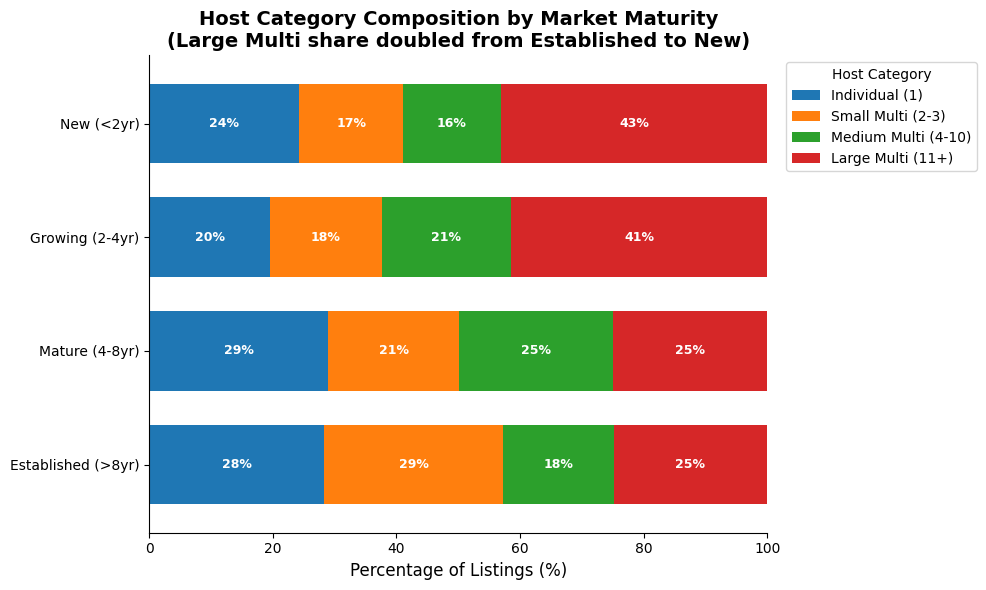

In [9]:
# 100% Stacked Bar Chart: Host Category Distribution by Market Maturity
fig, ax = plt.subplots(figsize=(10, 6))

# Create crosstab with percentages
ct = pd.crosstab(df['market_maturity'], df['host_category'], normalize='index') * 100

# Define order (chronological: old to new)
maturity_order = ['Established (>8yr)', 'Mature (4-8yr)', 'Growing (2-4yr)', 'New (<2yr)']
ct = ct.reindex(maturity_order)

# Define host category order (small to large for stacking)
host_order = ['Individual (1)', 'Small Multi (2-3)', 'Medium Multi (4-10)', 'Large Multi (11+)']
ct = ct[host_order]

# Plot stacked bar
ct.plot(kind='barh', stacked=True, ax=ax, width=0.7)

# Add percentage labels to each segment
for i, maturity in enumerate(maturity_order):
    cumsum = 0
    for host_cat in host_order:
        width = ct.loc[maturity, host_cat]
        if width > 8:  # Only label segments > 8%
            ax.text(cumsum + width/2, i, f'{width:.0f}%', 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        cumsum += width

# Styling
ax.set_xlabel('Percentage of Listings (%)', fontsize=12)
ax.set_ylabel('')
ax.set_title('Host Category Composition by Market Maturity\n(Large Multi share doubled from Established to New)', 
             fontsize=14, fontweight='bold')
ax.legend(title='Host Category', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xlim(0, 100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

In [10]:
# Chi-square test: host_category vs market_maturity
contingency_table = pd.crosstab(df['market_maturity'], df['host_category'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér's V effect size
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Print results
print("Chi-Square Test: host_category vs market_maturity")
print("=" * 60)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v:.3f}")

# Effect size interpretation
if cramers_v < 0.1:
    effect = "negligible"
elif cramers_v < 0.3:
    effect = "weak"
elif cramers_v < 0.5:
    effect = "moderate"
else:
    effect = "strong"
print(f"Effect size: {effect}")

# Show percentage shift for Large Multi
print("\n" + "=" * 60)
print("Large Multi (11+) Market Share by Cohort:")
pct = pd.crosstab(df['market_maturity'], df['host_category'], normalize='index') * 100
for maturity in ['Established (>8yr)', 'Mature (4-8yr)', 'Growing (2-4yr)', 'New (<2yr)']:
    share = pct.loc[maturity, 'Large Multi (11+)']
    print(f"  {maturity}: {share:.1f}%")

Chi-Square Test: host_category vs market_maturity
Chi-square statistic: 126.46
p-value: 0.0000000000
Degrees of freedom: 9
Cramér's V: 0.101
Effect size: weak

Large Multi (11+) Market Share by Cohort:
  Established (>8yr): 24.9%
  Mature (4-8yr): 25.0%
  Growing (2-4yr): 41.5%
  New (<2yr): 43.1%


1. Large Multi Dominance is Accelerating

From 25% (Established) → 43% (New) = +18 percentage points
This is the "professionalization thesis" playing out in real-time
Post-COVID recovery (2022-2024) was captured disproportionately by commercial operators
2. Individual Host "U-Shape" is Fascinating

Dipped during Growing period (20%) — possibly COVID deterrent for casual hosts
Rebounding in New (24%) — your hypothesis is plausible:
Tourism optimism in Greece post-pandemic
Lower barriers to entry (Airbnb simplification)
Economic pressure driving Greeks to monetize spare rooms
Possible "side hustle" trend among younger demographics
3. Medium/Small Multi Squeezed Out

The "middle class" of hosts is shrinking
Market polarizing toward scale (Large Multi) or authenticity (Individual)
Semi-professional operators (2-10 listings) losing competitive position

"Who's Driving the Boom?"

Thessaloniki's STR market has undergone structural transformation. Among listings entering pre-2017 (Established), host types were relatively balanced. But the post-COVID surge tells a different story: Large Multi-property operators now capture 43% of new market entries, nearly double their share among veteran listings.

Interestingly, Individual hosts show a U-shaped pattern—declining during 2020-2022 but rebounding strongly in 2023-2024, suggesting renewed interest from Greeks seeking tourism income. The losers? Mid-scale operators (2-10 listings), squeezed between professional scale and authentic appeal.

<hr>

### Price Segment

/var/folders/ks/037drkhd42324wgwpk_m9_940000gn/T/ipykernel_32338/2163677092.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('market_maturity')['review_scores_rating'].mean().reindex(maturity_order)


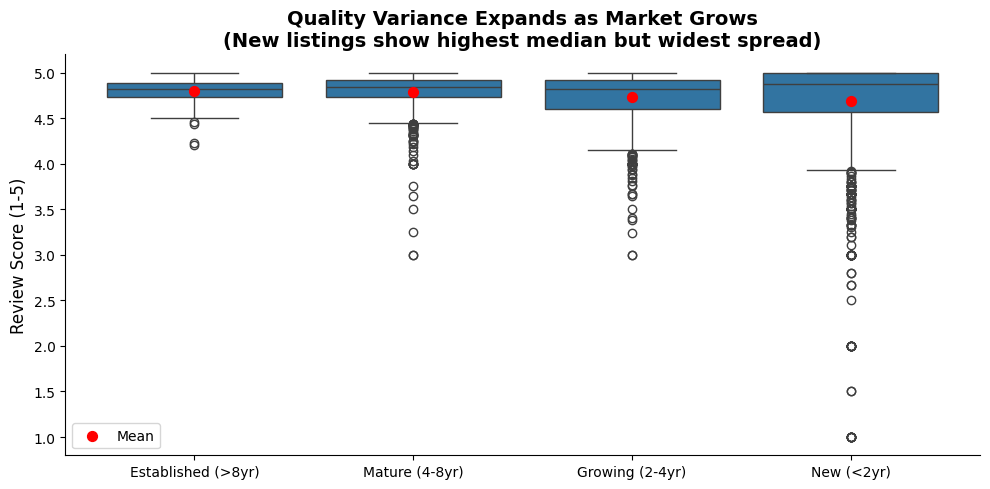

In [11]:
# Box Plot: Review Scores by Market Maturity
fig, ax = plt.subplots(figsize=(10, 5))

maturity_order = ['Established (>8yr)', 'Mature (4-8yr)', 'Growing (2-4yr)', 'New (<2yr)']

sns.boxplot(data=df, x='market_maturity', y='review_scores_rating', 
            order=maturity_order, ax=ax)

# Add mean markers
means = df.groupby('market_maturity')['review_scores_rating'].mean().reindex(maturity_order)
ax.scatter(range(len(maturity_order)), means, color='red', s=50, zorder=5, label='Mean')

ax.set_xlabel('')
ax.set_ylabel('Review Score (1-5)', fontsize=12)
ax.set_title('Quality Variance Expands as Market Grows\n(New listings show highest median but widest spread)', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

/var/folders/ks/037drkhd42324wgwpk_m9_940000gn/T/ipykernel_32338/2820081655.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['market_maturity', 'host_category'])['review_scores_rating'].mean().unstack()


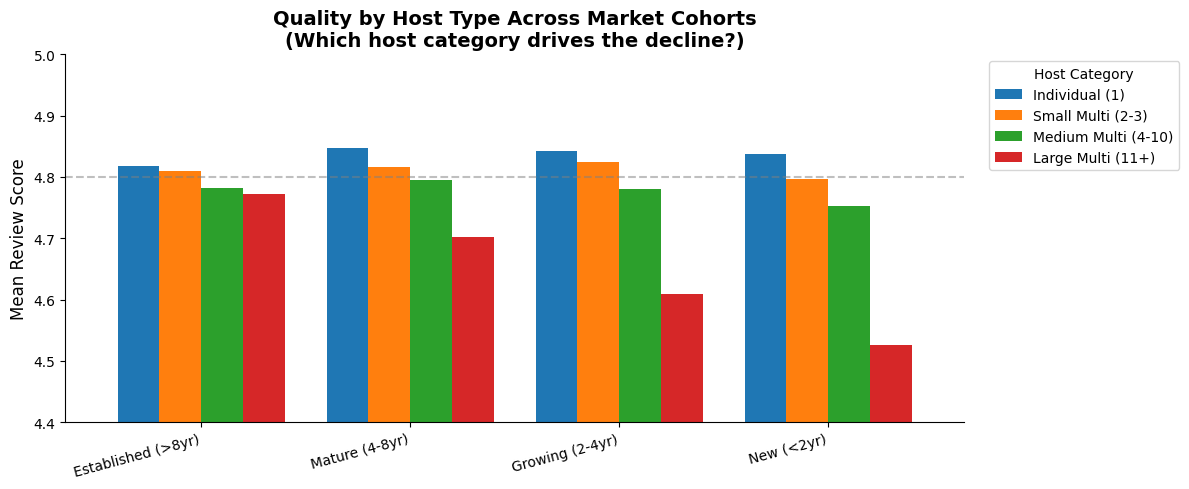

In [12]:
# Mean Rating by Host Category and Market Maturity
fig, ax = plt.subplots(figsize=(12, 5))

maturity_order = ['Established (>8yr)', 'Mature (4-8yr)', 'Growing (2-4yr)', 'New (<2yr)']
host_order = ['Individual (1)', 'Small Multi (2-3)', 'Medium Multi (4-10)', 'Large Multi (11+)']

# Calculate mean ratings
pivot = df.groupby(['market_maturity', 'host_category'])['review_scores_rating'].mean().unstack()
pivot = pivot.reindex(maturity_order)[host_order]

# Plot grouped bars
pivot.plot(kind='bar', ax=ax, width=0.8)

ax.set_xlabel('')
ax.set_ylabel('Mean Review Score', fontsize=12)
ax.set_title('Quality by Host Type Across Market Cohorts\n(Which host category drives the decline?)', 
             fontsize=14, fontweight='bold')
ax.set_xticklabels(maturity_order, rotation=15, ha='right')
ax.legend(title='Host Category', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_ylim(4.4, 5.0)  # Zoom in on meaningful range
ax.axhline(y=4.8, color='gray', linestyle='--', alpha=0.5, label='Superhost threshold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

"The Quality Bifurcation"

As Thessaloniki's STR market expands, a quality divergence emerges. Established listings (>8yr) maintain tight, high-quality performance (σ=0.14). But among new entrants (<2yr), variance has nearly quadrupled (σ=0.51) — the highest median (4.87) coexists with the lowest mean (4.68).

This suggests market bifurcation: successful new entrants achieve excellent ratings quickly, while a growing tail of underperformers drags down the average. The "everyone wants to be a host" boom may be creating a quality gap that warrants monitoring.

/var/folders/ks/037drkhd42324wgwpk_m9_940000gn/T/ipykernel_32338/2024832743.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = large_multi.pivot_table(


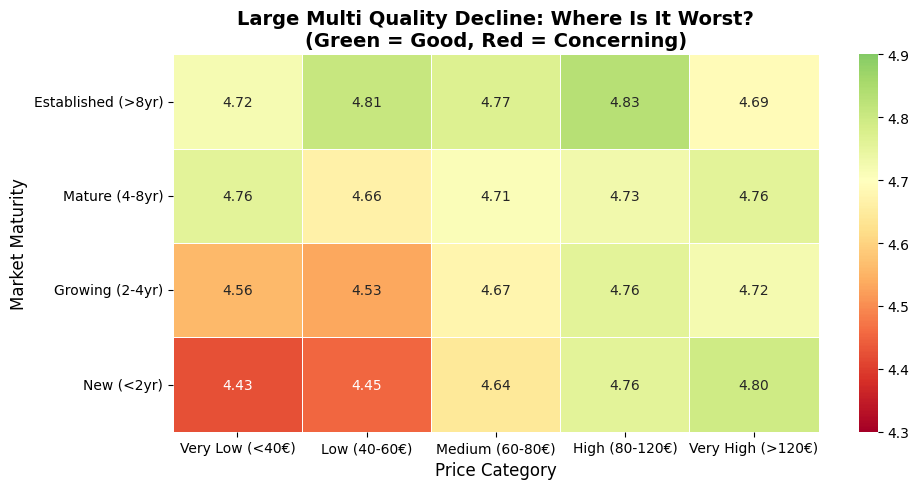

In [13]:
# Heatmap: Large Multi Mean Ratings
fig, ax = plt.subplots(figsize=(10, 5))

large_multi = df[df['host_category'] == 'Large Multi (11+)']

maturity_order = ['Established (>8yr)', 'Mature (4-8yr)', 'Growing (2-4yr)', 'New (<2yr)']
price_order = ['Very Low (<40€)', 'Low (40-60€)', 'Medium (60-80€)', 'High (80-120€)', 'Very High (>120€)']

# Create pivot
heatmap_data = large_multi.pivot_table(
    values='review_scores_rating', 
    index='market_maturity', 
    columns='price_cat', 
    aggfunc='mean'
).reindex(maturity_order)[price_order]

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=4.7, vmin=4.3, vmax=4.9,
            linewidths=0.5, ax=ax)

ax.set_title('Large Multi Quality Decline: Where Is It Worst?\n(Green = Good, Red = Concerning)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Price Category', fontsize=12)
ax.set_ylabel('Market Maturity', fontsize=12)

plt.tight_layout()
plt.show()

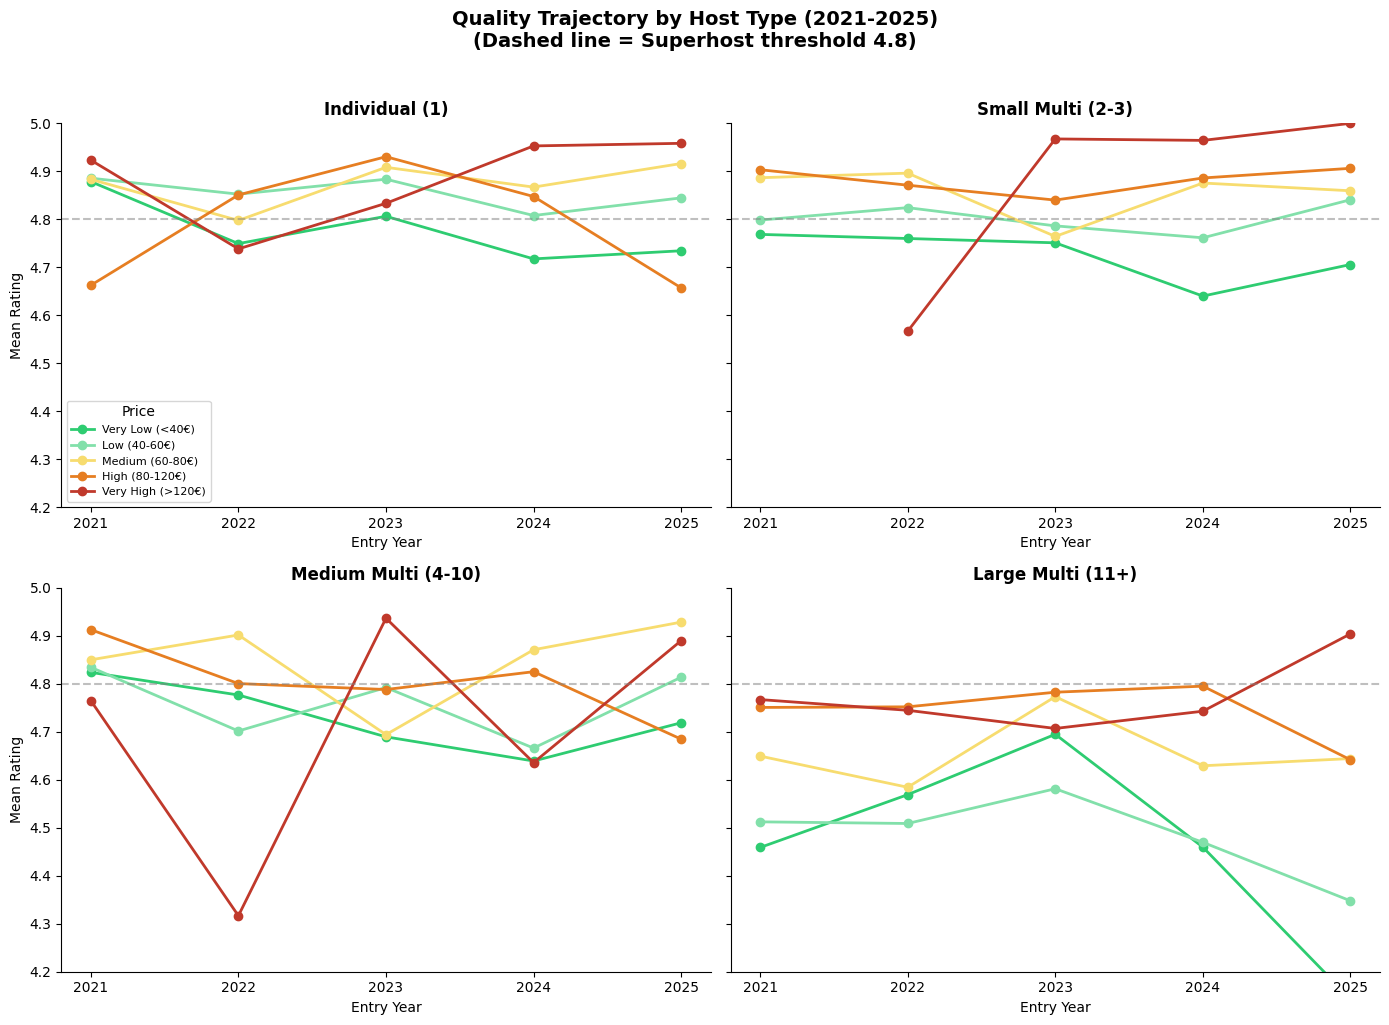

In [14]:
# Filter to post-COVID and create year variable
df_post_covid = df[df['first_review_date'].dt.year >= 2021].copy()

# Small Multiples: Rating trend by Host Category (facets) × Price Category (lines)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

host_order = ['Individual (1)', 'Small Multi (2-3)', 'Medium Multi (4-10)', 'Large Multi (11+)']
price_order = ['Very Low (<40€)', 'Low (40-60€)', 'Medium (60-80€)', 'High (80-120€)', 'Very High (>120€)']
colors = ['#2ecc71', '#82e0aa', '#f7dc6f', '#e67e22', '#c0392b']

for idx, host_cat in enumerate(host_order):
    ax = axes[idx]
    subset = df_post_covid[df_post_covid['host_category'] == host_cat]
    
    for i, price_cat in enumerate(price_order):
        price_subset = subset[subset['price_cat'] == price_cat]
        yearly_mean = price_subset.groupby(price_subset['first_review_date'].dt.year)['review_scores_rating'].mean()
        
        if len(yearly_mean) > 1:  # Only plot if multiple years
            ax.plot(yearly_mean.index, yearly_mean.values, 
                    marker='o', label=price_cat, color=colors[i], linewidth=2)
    
    ax.set_title(f'{host_cat}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Entry Year')
    ax.set_ylabel('Mean Rating' if idx % 2 == 0 else '')
    ax.set_ylim(4.2, 5.0)
    ax.axhline(y=4.8, color='gray', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([2021, 2022, 2023, 2024, 2025])
    
    if idx == 0:
        ax.legend(title='Price', fontsize=8, loc='lower left')

fig.suptitle('Quality Trajectory by Host Type (2021-2025)\n(Dashed line = Superhost threshold 4.8)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

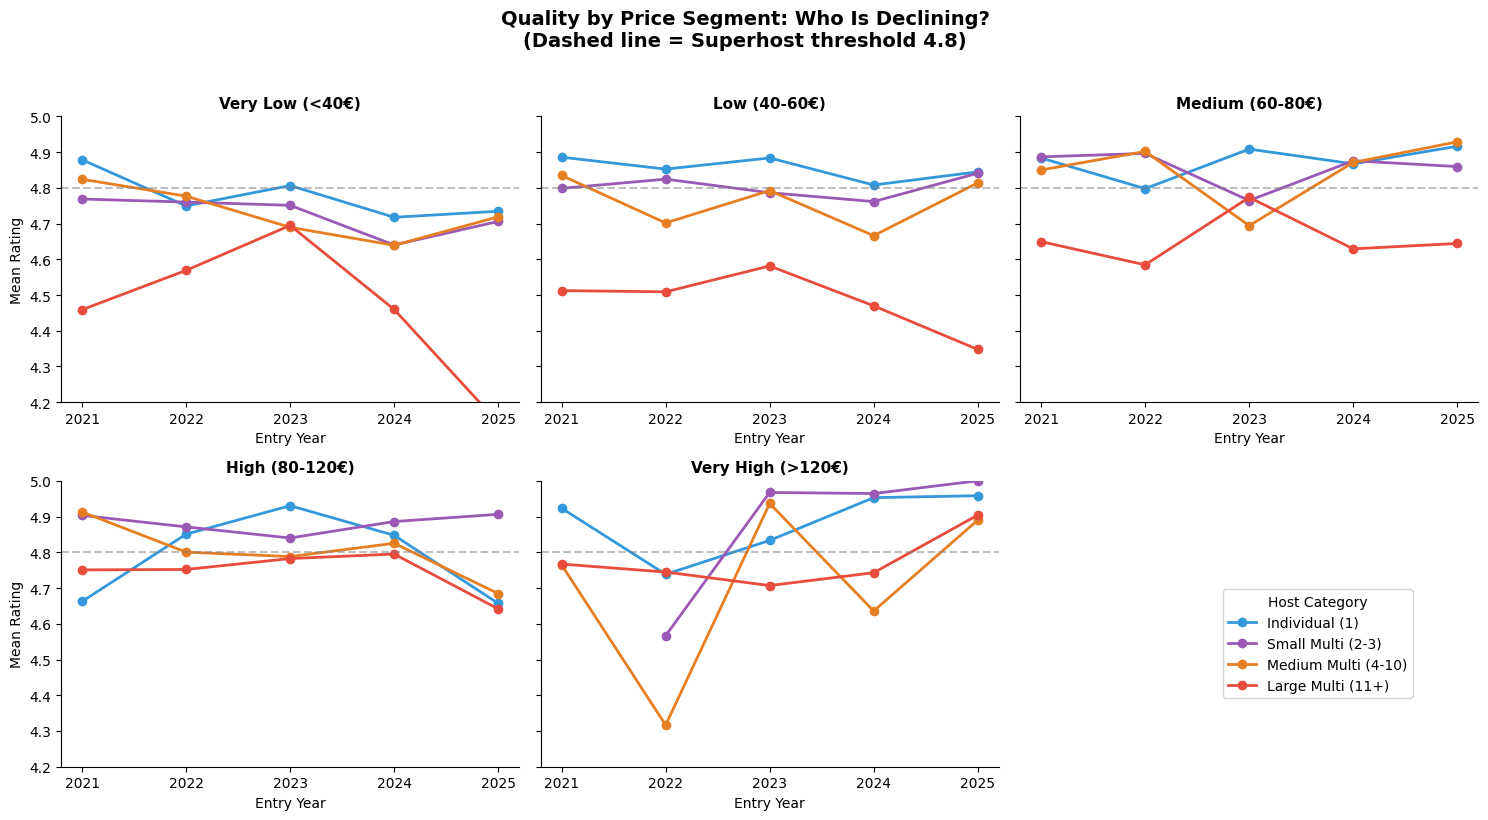

In [15]:
# Alternative view: Facet by Price, lines = Host Category
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

host_order = ['Individual (1)', 'Small Multi (2-3)', 'Medium Multi (4-10)', 'Large Multi (11+)']
price_order = ['Very Low (<40€)', 'Low (40-60€)', 'Medium (60-80€)', 'High (80-120€)', 'Very High (>120€)']
host_colors = ['#3498db', '#9b59b6', '#e67e22', '#e74c3c']

for idx, price_cat in enumerate(price_order):
    ax = axes[idx]
    subset = df_post_covid[df_post_covid['price_cat'] == price_cat]
    
    for i, host_cat in enumerate(host_order):
        host_subset = subset[subset['host_category'] == host_cat]
        yearly_mean = host_subset.groupby(host_subset['first_review_date'].dt.year)['review_scores_rating'].mean()
        
        if len(yearly_mean) > 1:
            ax.plot(yearly_mean.index, yearly_mean.values, 
                    marker='o', label=host_cat, color=host_colors[i], linewidth=2)
    
    ax.set_title(f'{price_cat}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Entry Year')
    ax.set_ylabel('Mean Rating' if idx % 3 == 0 else '')
    ax.set_ylim(4.2, 5.0)
    ax.axhline(y=4.8, color='gray', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([2021, 2022, 2023, 2024, 2025])

# Hide empty subplot
axes[5].set_visible(False)

# Single legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Host Category', loc='lower right', bbox_to_anchor=(0.95, 0.15))

fig.suptitle('Quality by Price Segment: Who Is Declining?\n(Dashed line = Superhost threshold 4.8)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [16]:
# H6a: Large Multi Budget Quality Decline
budget_cats = ['Very Low (<40€)', 'Low (40-60€)']
large_multi_budget = df[(df['host_category'] == 'Large Multi (11+)') & 
                        (df['price_cat'].isin(budget_cats))]

# Compare New vs Mature+Established
new_ratings = large_multi_budget[large_multi_budget['market_maturity'] == 'New (<2yr)']['review_scores_rating'].dropna()
established_ratings = large_multi_budget[large_multi_budget['market_maturity'].isin(['Mature (4-8yr)', 'Established (>8yr)'])]['review_scores_rating'].dropna()

# Mann-Whitney U (non-normal distributions)
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(established_ratings, new_ratings, alternative='greater')

# Effect size (rank-biserial correlation)
n1, n2 = len(established_ratings), len(new_ratings)
rank_biserial = 1 - (2 * stat) / (n1 * n2)

print("H6a: Large Multi Budget Quality Decline")
print("=" * 60)
print(f"Established+Mature mean: {established_ratings.mean():.3f}")
print(f"New entrants mean: {new_ratings.mean():.3f}")
print(f"Difference: {established_ratings.mean() - new_ratings.mean():.3f}")
print(f"\nMann-Whitney U: {stat:.0f}")
print(f"P-value (one-tailed): {p_value:.6f}")
print(f"Rank-biserial r: {rank_biserial:.3f}")

# Effect size interpretation
if abs(rank_biserial) < 0.1:
    effect = "negligible"
elif abs(rank_biserial) < 0.3:
    effect = "small"
elif abs(rank_biserial) < 0.5:
    effect = "medium"
else:
    effect = "large"
print(f"Effect size: {effect}")

H6a: Large Multi Budget Quality Decline
Established+Mature mean: 4.705
New entrants mean: 4.445
Difference: 0.260

Mann-Whitney U: 54837
P-value (one-tailed): 0.000015
Rank-biserial r: -0.218
Effect size: small


In [23]:
# H6a: Large Multi very low Quality Decline
budget_cats = ['Very Low (<40€)']
large_multi_budget = df[(df['host_category'] == 'Large Multi (11+)') & 
                        (df['price_cat'].isin(budget_cats))]

# Compare New vs Mature+Established
new_ratings = large_multi_budget[large_multi_budget['market_maturity'] == 'New (<2yr)']['review_scores_rating'].dropna()
established_ratings = large_multi_budget[large_multi_budget['market_maturity'].isin(['Mature (4-8yr)', 'Established (>8yr)'])]['review_scores_rating'].dropna()

# Mann-Whitney U (non-normal distributions)
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(established_ratings, new_ratings, alternative='greater')

# Effect size (rank-biserial correlation)
n1, n2 = len(established_ratings), len(new_ratings)
rank_biserial = 1 - (2 * stat) / (n1 * n2)

print("H6a: Large Multi Budget Quality Decline")
print("=" * 60)
print(f"Established+Mature mean: {established_ratings.mean():.3f}")
print(f"New entrants mean: {new_ratings.mean():.3f}")
print(f"Difference: {established_ratings.mean() - new_ratings.mean():.3f}")
print(f"\nMann-Whitney U: {stat:.0f}")
print(f"P-value (one-tailed): {p_value:.6f}")
print(f"Rank-biserial r: {rank_biserial:.3f}")

# Effect size interpretation
if abs(rank_biserial) < 0.1:
    effect = "negligible"
elif abs(rank_biserial) < 0.3:
    effect = "small"
elif abs(rank_biserial) < 0.5:
    effect = "medium"
else:
    effect = "large"
print(f"Effect size: {effect}")

H6a: Large Multi Budget Quality Decline
Established+Mature mean: 4.745
New entrants mean: 4.426
Difference: 0.319

Mann-Whitney U: 4748
P-value (one-tailed): 0.000280
Rank-biserial r: -0.328
Effect size: medium


In [18]:
# H6b: High Segment Quality Decline
high_segment = df[df['price_cat'] == 'High (80-120€)']

# Two-way ANOVA: maturity + host_category on ratings


# Fit model
model = ols('review_scores_rating ~ C(market_maturity) + C(host_category) + C(market_maturity):C(host_category)', 
            data=high_segment.dropna(subset=['review_scores_rating'])).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

print("H6b: High Segment Two-Way ANOVA")
print("=" * 60)
print(anova_table.round(4))

# Eta-squared for maturity effect
ss_maturity = anova_table.loc['C(market_maturity)', 'sum_sq']
ss_total = anova_table['sum_sq'].sum()
eta_sq_maturity = ss_maturity / ss_total

print(f"\nEta-squared (maturity effect): {eta_sq_maturity:.4f}")

H6b: High Segment Two-Way ANOVA
                                     sum_sq     df    F  PR(>F)
C(market_maturity)                     0.06   3.00 0.17    0.92
C(host_category)                       1.15   3.00 3.56    0.01
C(market_maturity):C(host_category)    0.35   9.00 0.36    0.95
Residual                              56.54 526.00  NaN     NaN

Eta-squared (maturity effect): 0.0010


In [19]:
# H6c: Very High Segment Improvement
very_high = df[df['price_cat'] == 'Very High (>120€)']

# Compare by maturity
new_vh = very_high[very_high['market_maturity'] == 'New (<2yr)']['review_scores_rating'].dropna()
mature_vh = very_high[very_high['market_maturity'].isin(['Mature (4-8yr)', 'Established (>8yr)'])]['review_scores_rating'].dropna()

stat, p_value = mannwhitneyu(new_vh, mature_vh, alternative='greater')

n1, n2 = len(new_vh), len(mature_vh)
rank_biserial = 1 - (2 * stat) / (n1 * n2)

print("H6c: Very High Segment Quality Improvement")
print("=" * 60)
print(f"New entrants mean: {new_vh.mean():.3f}")
print(f"Mature+Established mean: {mature_vh.mean():.3f}")
print(f"Difference: {new_vh.mean() - mature_vh.mean():.3f}")
print(f"\nMann-Whitney U: {stat:.0f}")
print(f"P-value (one-tailed, new > mature): {p_value:.6f}")
print(f"Rank-biserial r: {rank_biserial:.3f}")

H6c: Very High Segment Quality Improvement
New entrants mean: 4.846
Mature+Established mean: 4.795
Difference: 0.051

Mann-Whitney U: 4464
P-value (one-tailed, new > mature): 0.000290
Rank-biserial r: -0.309


---

## Key Findings: The Quality Squeeze

Thessaloniki's STR market is experiencing **price-segment divergence** in quality trajectories. As Large Multi operators rapidly expand (25% → 43% market share), their quality performance splits dramatically by price positioning.

### Finding 1: Budget Segment Quality Decline ⚠️

**New Large Multi budget listings (<€60) rate significantly lower than established ones.**

| Metric | Established+Mature | New Entrants | Difference |
|--------|-------------------|--------------|------------|
| Mean Rating | 4.71 - 4.75 | 4.43 - 4.45 | **-0.26 to -0.32** |
| Effect Size | — | — | Small to Medium (r = 0.22-0.33) |
| Statistical Test | Mann-Whitney U | p < 0.001 | **Significant** |

**Interpretation**: Commercial operators entering the budget segment are cutting corners. The "volume over quality" strategy may be eroding guest satisfaction at the affordable end of the market.

### Finding 2: Premium Segment Quality Improvement ✅

**New Very High listings (>€120) outperform established ones.**

| Metric | Mature+Established | New Entrants | Difference |
|--------|-------------------|--------------|------------|
| Mean Rating | 4.80 | 4.85 | **+0.05** |
| Effect Size | — | — | Medium (r = 0.31) |
| Statistical Test | Mann-Whitney U | p < 0.001 | **Significant** |

**Interpretation**: The premium segment remains healthy. New entrants targeting affluent guests maintain—and slightly exceed—quality standards. Competition at the top drives excellence.

### Finding 3: Mid-Range Segment (€80-120) — No Temporal Effect

Two-way ANOVA found **no significant maturity effect** (η² = 0.001, p = 0.92) in the High segment. Quality differences are driven by host type, not market timing.

---

### Policy Implications

| Segment | Trend | Risk Level | Recommended Action |
|---------|-------|------------|-------------------|
| Budget (<€60) | Declining | 🔴 High | Quality monitoring for new Large Multi entrants |
| Mid-Range (€60-120) | Stable | 🟡 Moderate | No intervention needed |
| Premium (>€120) | Improving | 🟢 Low | Market self-regulating |

> **Dashboard Headline**: *"The Quality Squeeze — Budget listings from new commercial operators show declining ratings while premium segment thrives"*

<hr>

est occupancy revenue

"Despite rapid professionalization, core performance metrics (revenue, occupancy, review velocity) remain stable across market cohorts. New listings achieve comparable booking performance to veterans—the quality squeeze is about guest satisfaction, not commercial viability."

distance cat

"Geographic distribution remains stable—new listings don't disperse to periphery. However, within the central zone, growth has shifted from Downtown (<1km) to Inner City (1-3km), possibly reflecting downtown saturation or rising property costs."

<hr>

## Appendix: Exploratory Analysis Code

*The cells below contain exploratory analysis used during development. They are preserved for reproducibility but are not part of the main narrative.*

In [20]:
# Variables to check against market maturity
variables = [
    "distance_cat",
    "host_category",
    "price_cat", 
    "host_is_superhost", 
    "review_scores_rating",
    "estimated_revenue_l365d", 
    "estimated_occupancy_l365d",
    "reviews_per_month"
]

CATEGORICAL VARIABLE ANALYSIS: distance_cat

Cardinality: 4 unique categories
Missing values: 0 (0.00%)
Total observations: 4124

Most Common Category: 'Inner City (1-3km)' (2189 occurrences, 53.08%)

Rare Categories (<5%): 1
  - 'Suburban (>6km)': 91 (2.21%)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                       Count  Percentage
distance_cat                            
Inner City (1-3km)      2189       53.08
Downtown (<1km)         1357       32.90
Neighborhoods (3-6km)    487       11.81
Suburban (>6km)           91        2.21


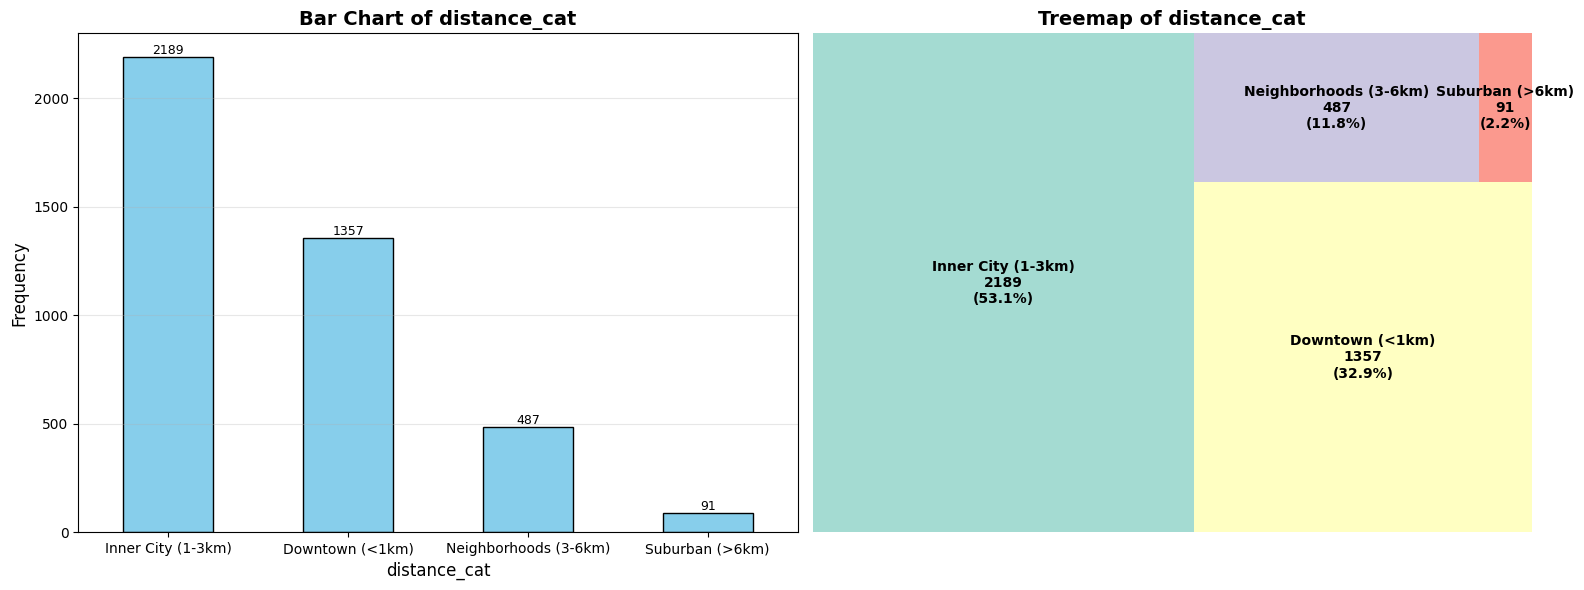

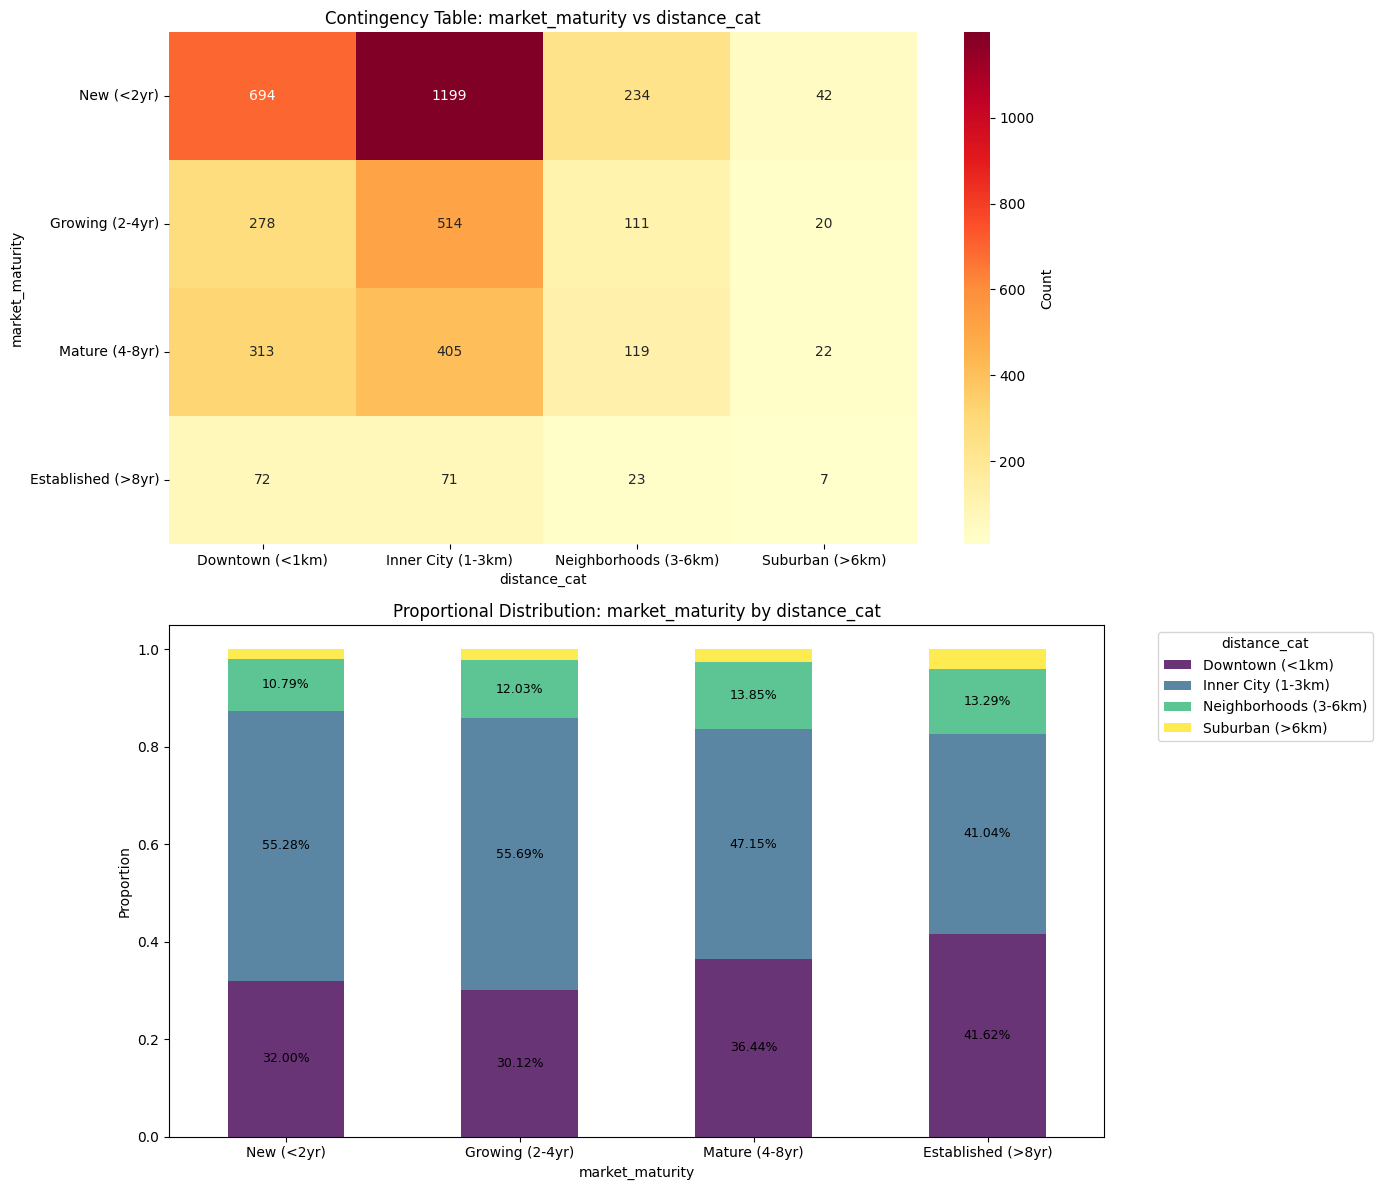

CHI-SQUARE TEST OF INDEPENDENCE: market_maturity vs distance_cat

Contingency Table:
distance_cat        Downtown (<1km)  Inner City (1-3km)  \
market_maturity                                           
New (<2yr)                      694                1199   
Growing (2-4yr)                 278                 514   
Mature (4-8yr)                  313                 405   
Established (>8yr)               72                  71   

distance_cat        Neighborhoods (3-6km)  Suburban (>6km)  
market_maturity                                             
New (<2yr)                            234               42  
Growing (2-4yr)                       111               20  
Mature (4-8yr)                        119               22  
Established (>8yr)                     23                7  

Test Statistics:
  Chi-square statistic: 32.7294
  Degrees of freedom:   9
  P-value:              0.000149
  Cramér's V:           0.051
  Effect size:          Negligible association
  Signif

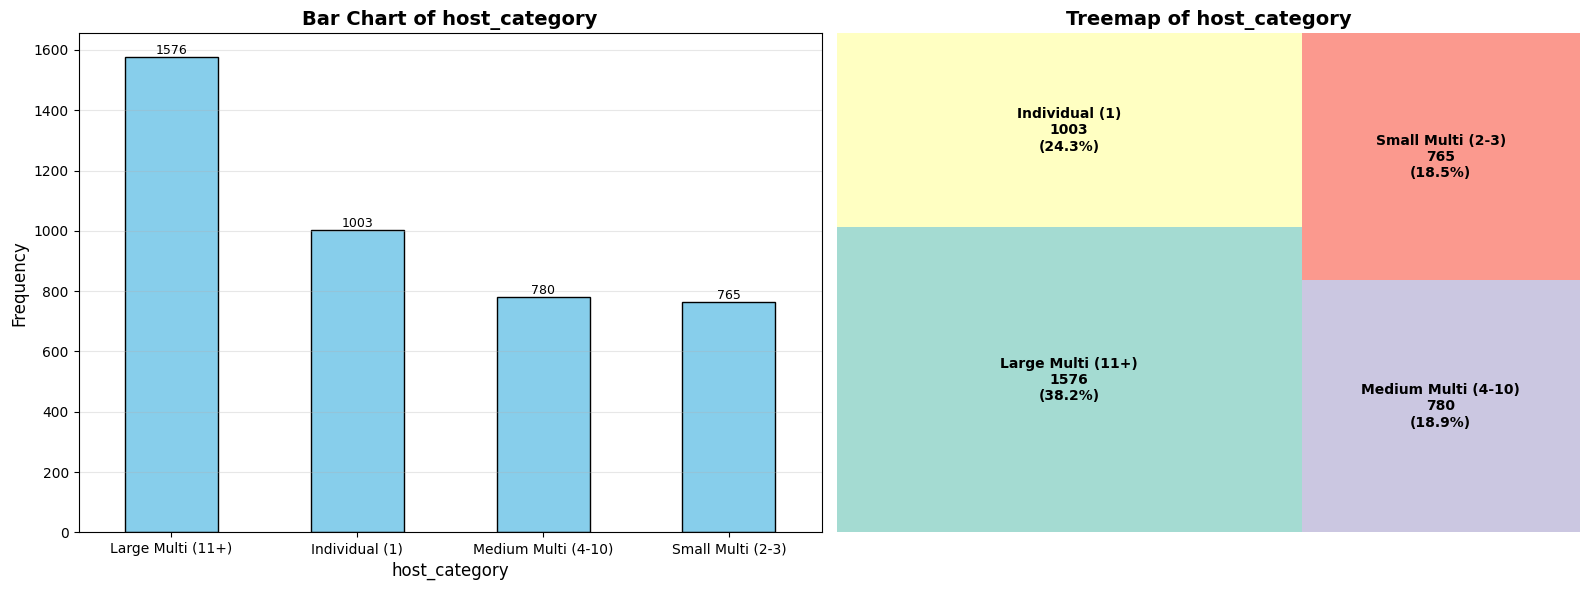

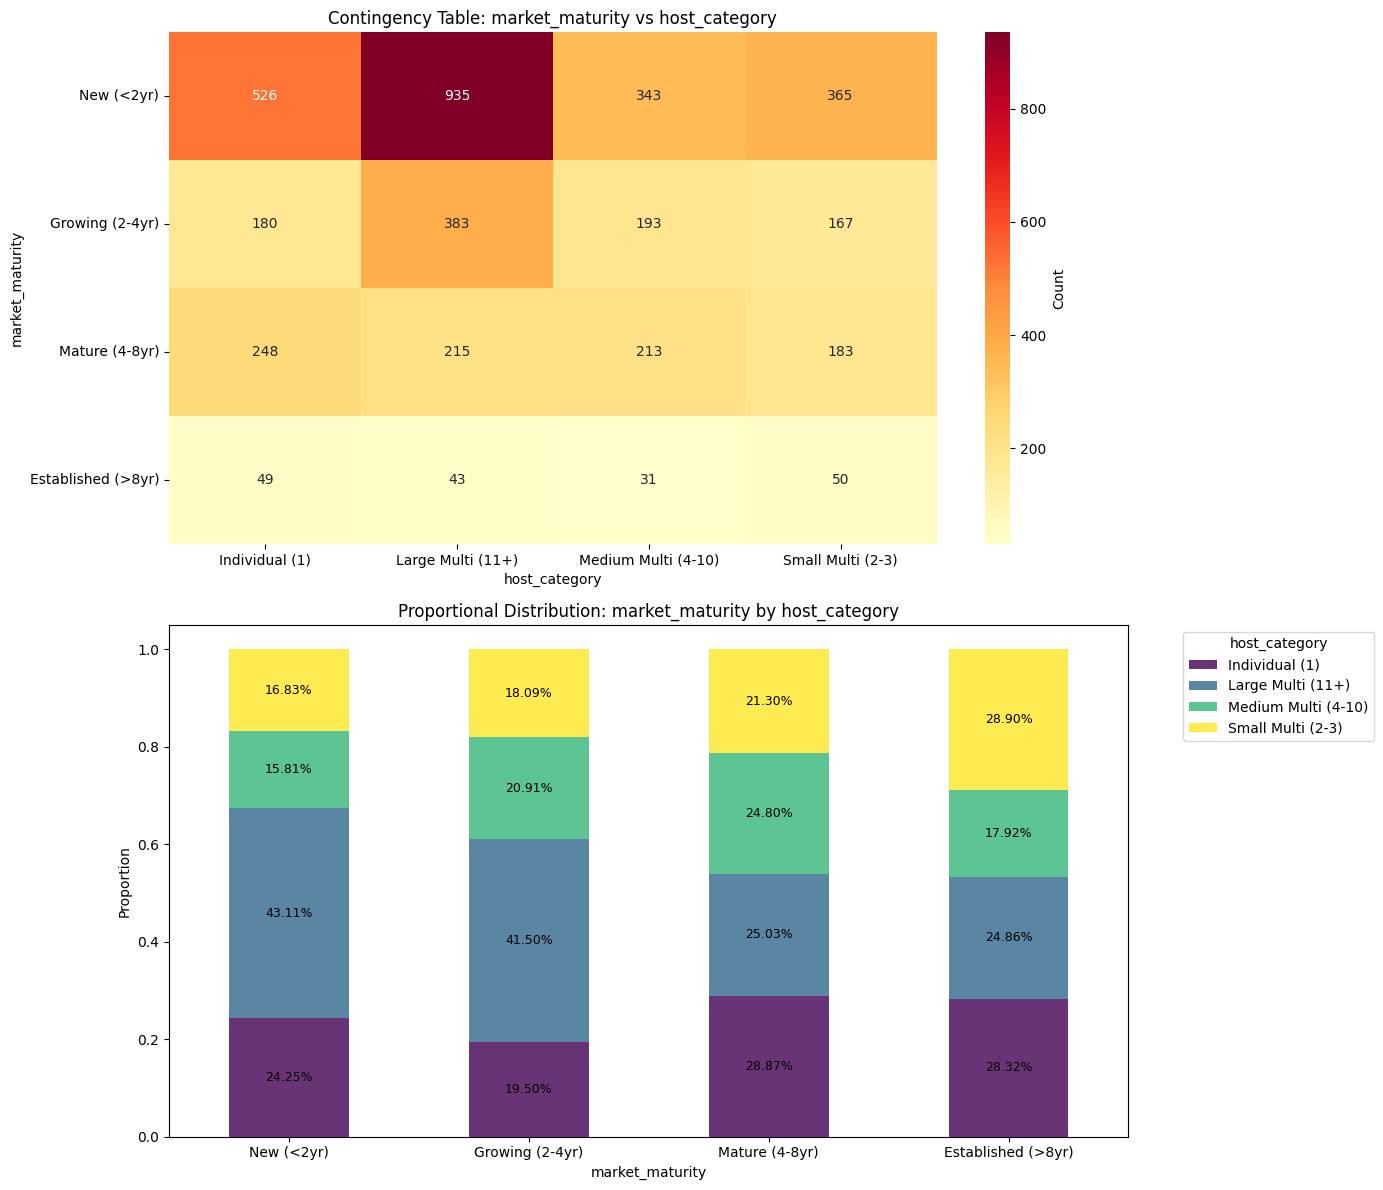

CHI-SQUARE TEST OF INDEPENDENCE: market_maturity vs host_category

Contingency Table:
host_category       Individual (1)  Large Multi (11+)  Medium Multi (4-10)  \
market_maturity                                                              
New (<2yr)                     526                935                  343   
Growing (2-4yr)                180                383                  193   
Mature (4-8yr)                 248                215                  213   
Established (>8yr)              49                 43                   31   

host_category       Small Multi (2-3)  
market_maturity                        
New (<2yr)                        365  
Growing (2-4yr)                   167  
Mature (4-8yr)                    183  
Established (>8yr)                 50  

Test Statistics:
  Chi-square statistic: 126.4639
  Degrees of freedom:   9
  P-value:              0.000000
  Cramér's V:           0.101
  Effect size:          Weak association
  Significant at α=0.05:

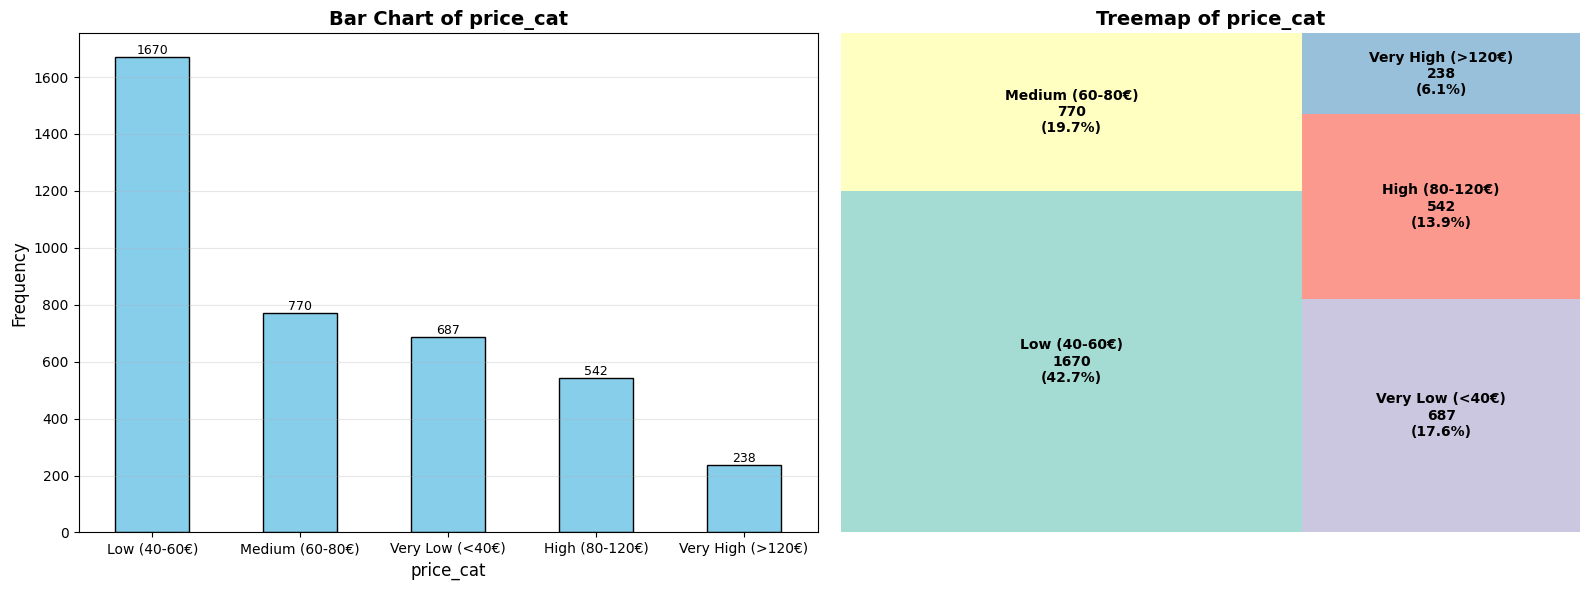

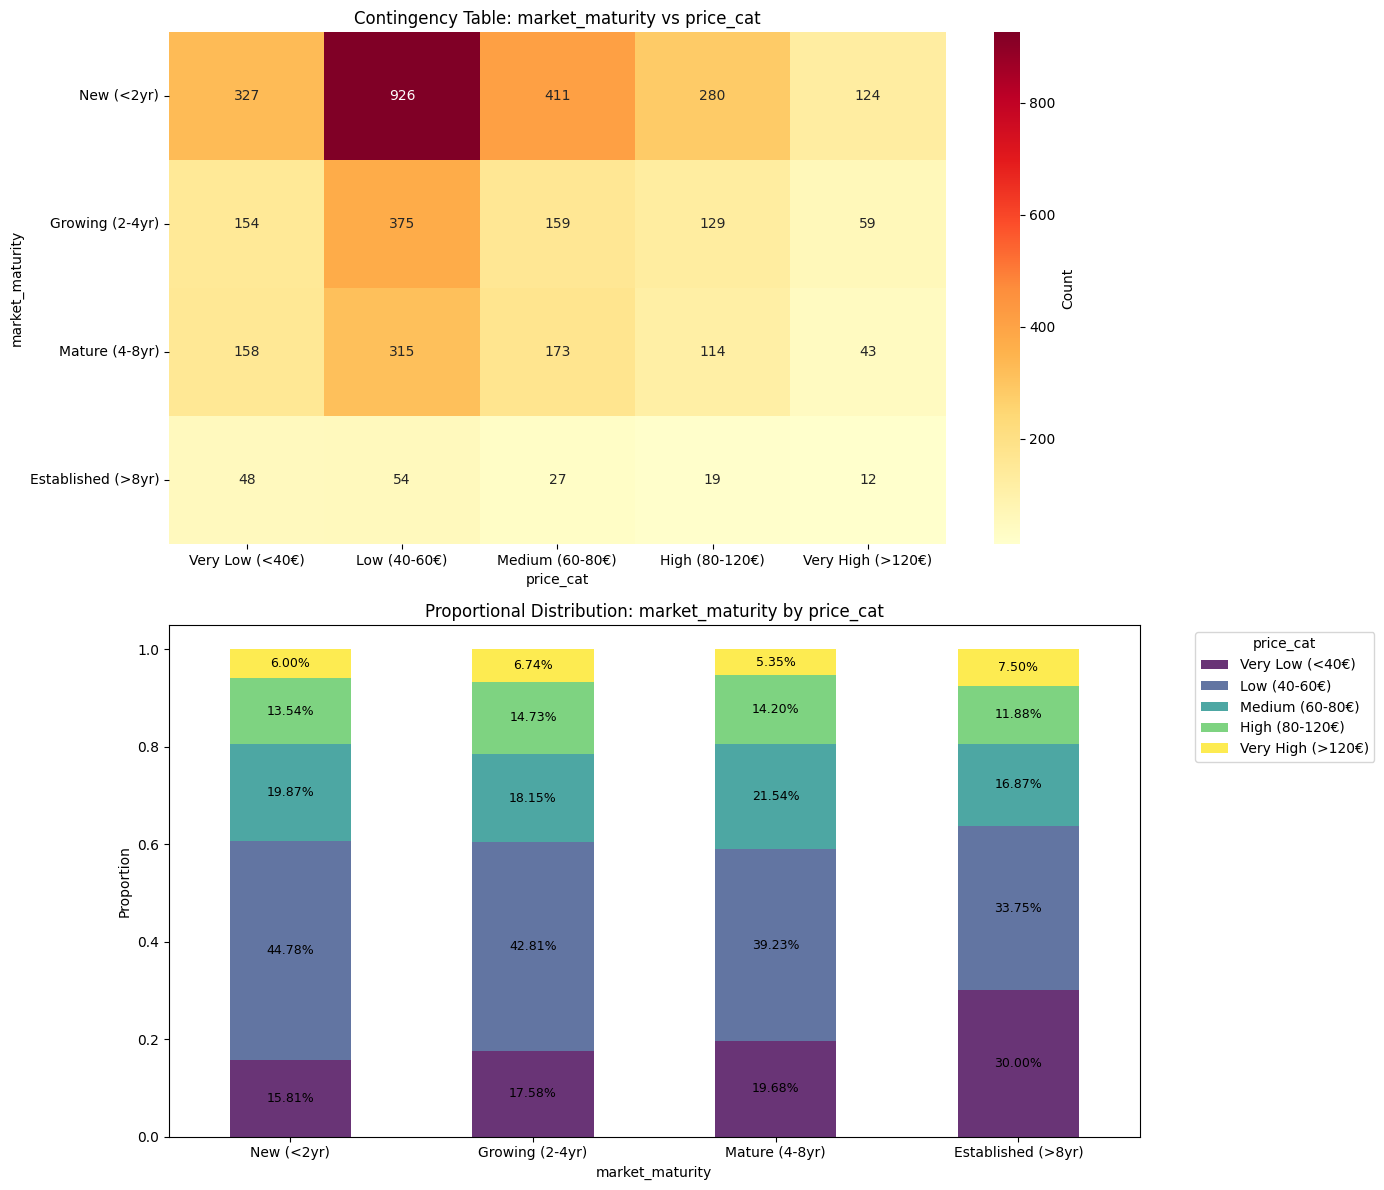

CHI-SQUARE TEST OF INDEPENDENCE: market_maturity vs price_cat

Contingency Table:
price_cat           Very Low (<40€)  Low (40-60€)  Medium (60-80€)  \
market_maturity                                                      
New (<2yr)                      327           926              411   
Growing (2-4yr)                 154           375              159   
Mature (4-8yr)                  158           315              173   
Established (>8yr)               48            54               27   

price_cat           High (80-120€)  Very High (>120€)  
market_maturity                                        
New (<2yr)                     280                124  
Growing (2-4yr)                129                 59  
Mature (4-8yr)                 114                 43  
Established (>8yr)              19                 12  

Test Statistics:
  Chi-square statistic: 33.2111
  Degrees of freedom:   12
  P-value:              0.000897
  Cramér's V:           0.053
  Effect size:       

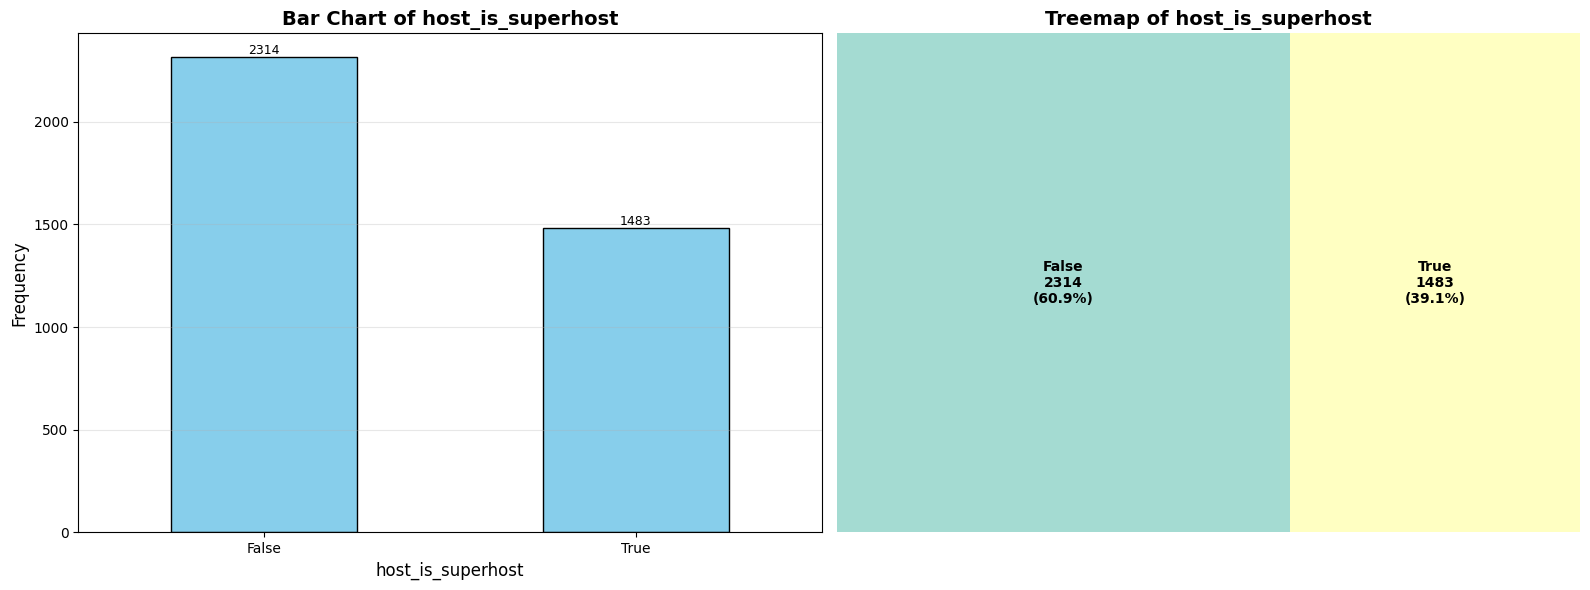

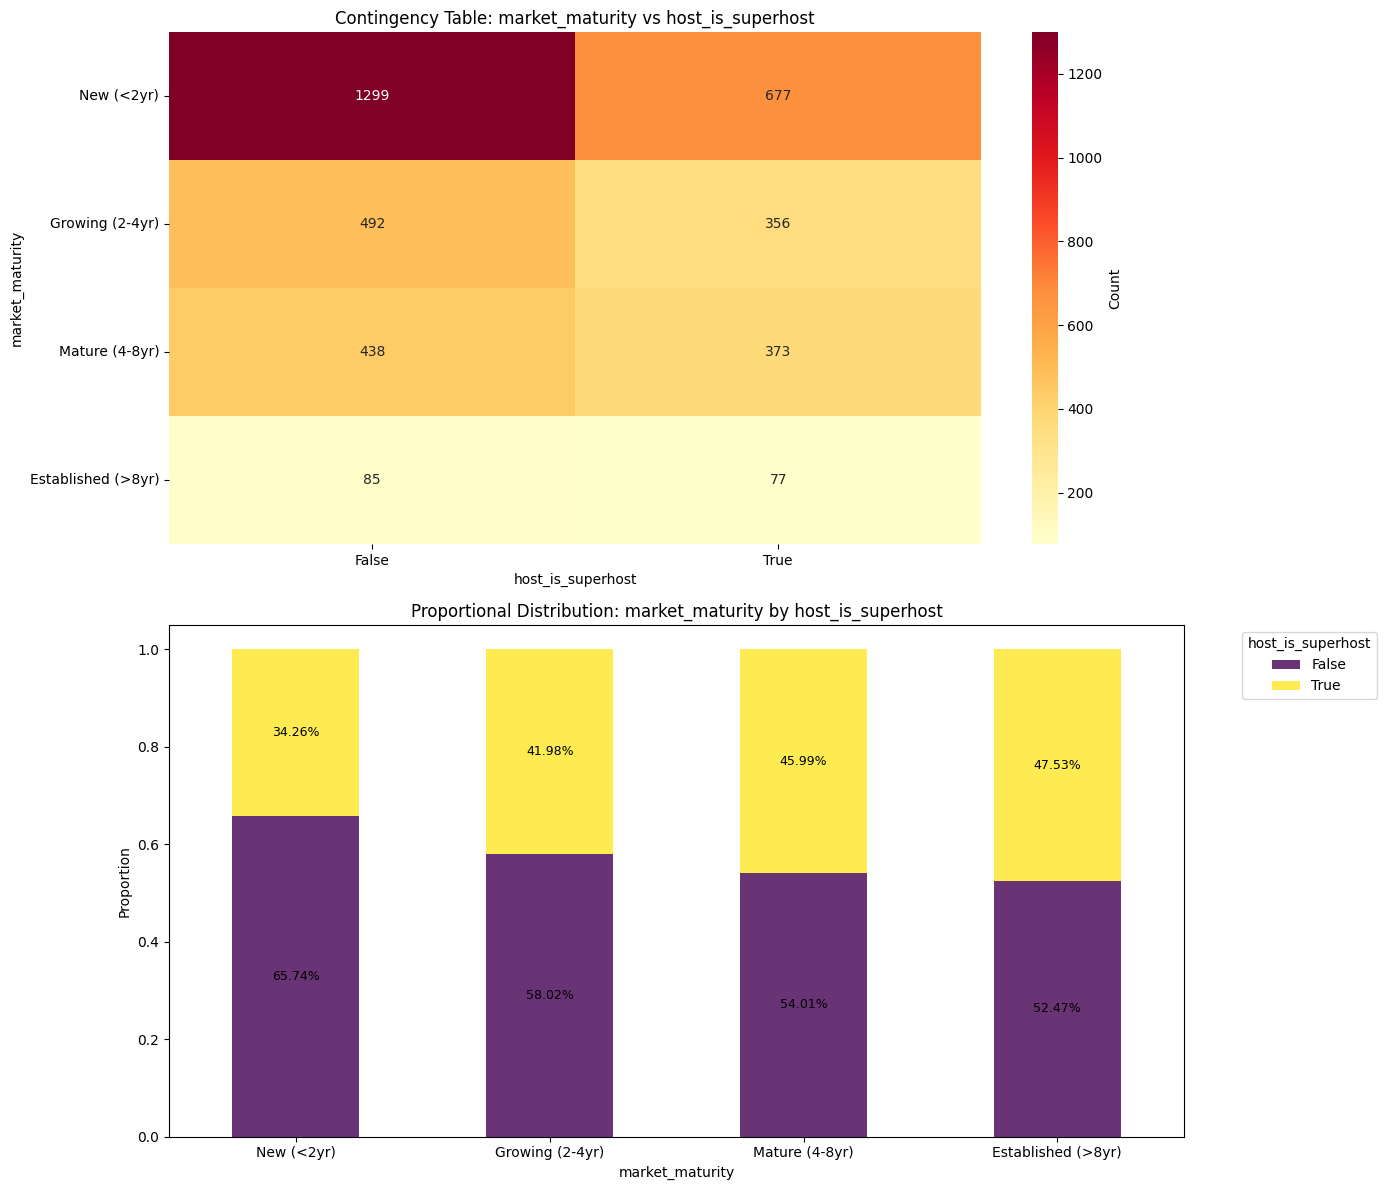

CHI-SQUARE TEST OF INDEPENDENCE: market_maturity vs host_is_superhost

Contingency Table:
host_is_superhost   False  True 
market_maturity                 
New (<2yr)           1299    677
Growing (2-4yr)       492    356
Mature (4-8yr)        438    373
Established (>8yr)     85     77

Test Statistics:
  Chi-square statistic: 43.4169
  Degrees of freedom:   3
  P-value:              0.000000
  Cramér's V:           0.107
  Effect size:          Weak association
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT association detected (p=0.000000). market_maturity and host_is_superhost are related. Weak association (Cramér's V = 0.107).

 

DESCRIPTIVE STATISTICS: review_scores_rating

Central Tendency:
  Mean:           4.72
  Median:         4.84
  Mode:           5.0

Dispersion:
  Std Dev:        0.41
  Variance:       0.17
  Range:          4.00
  IQR:            0.33

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       4.64
  Q2 (50%):       4.84
  Q3 (75%):       4.97
  

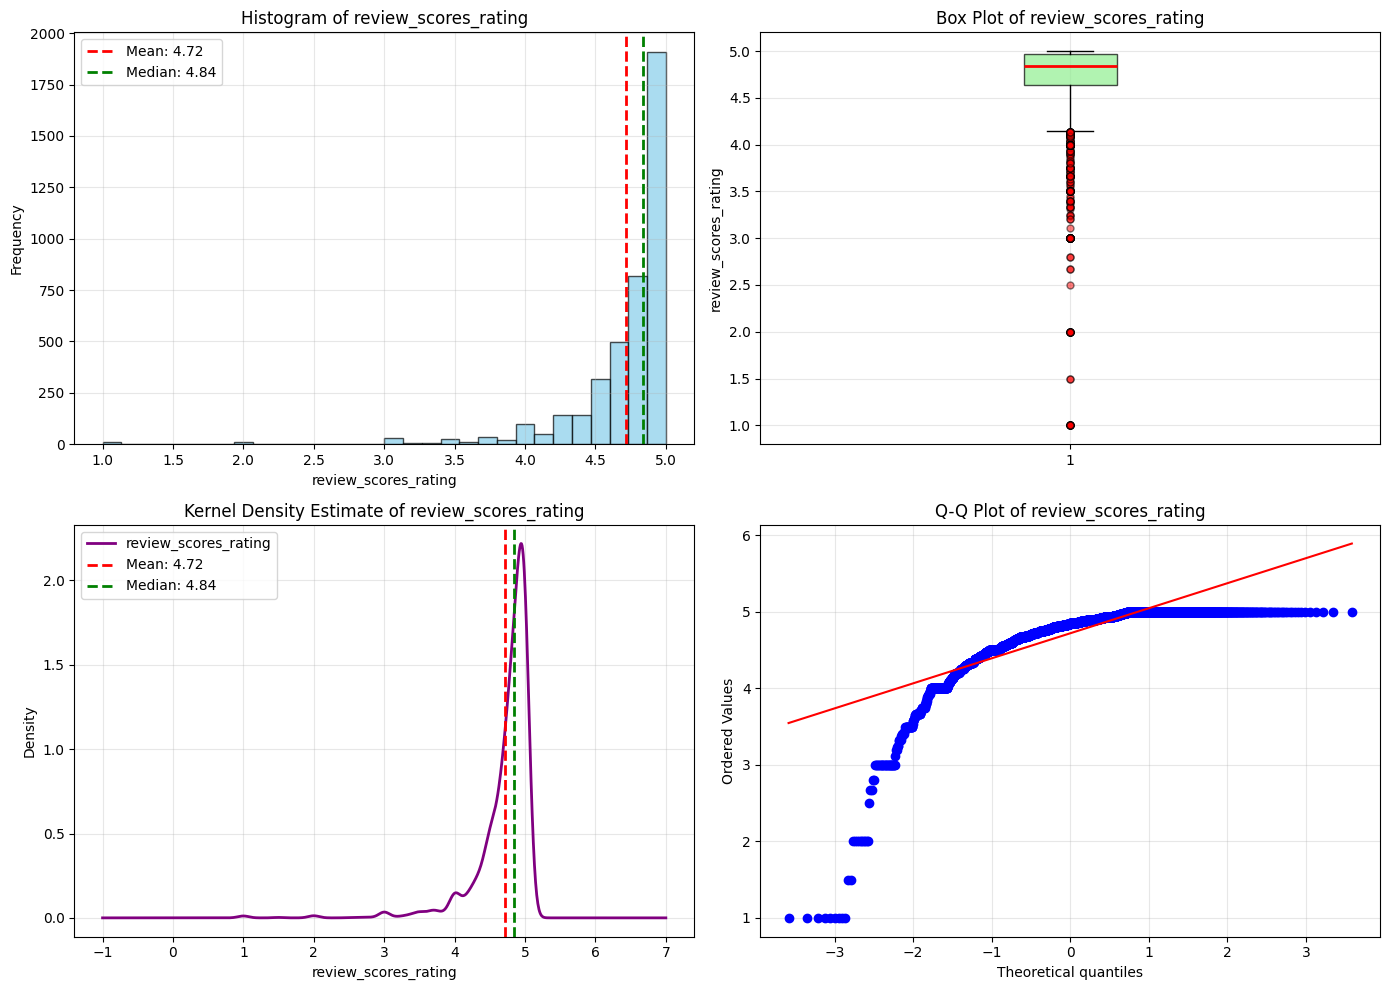

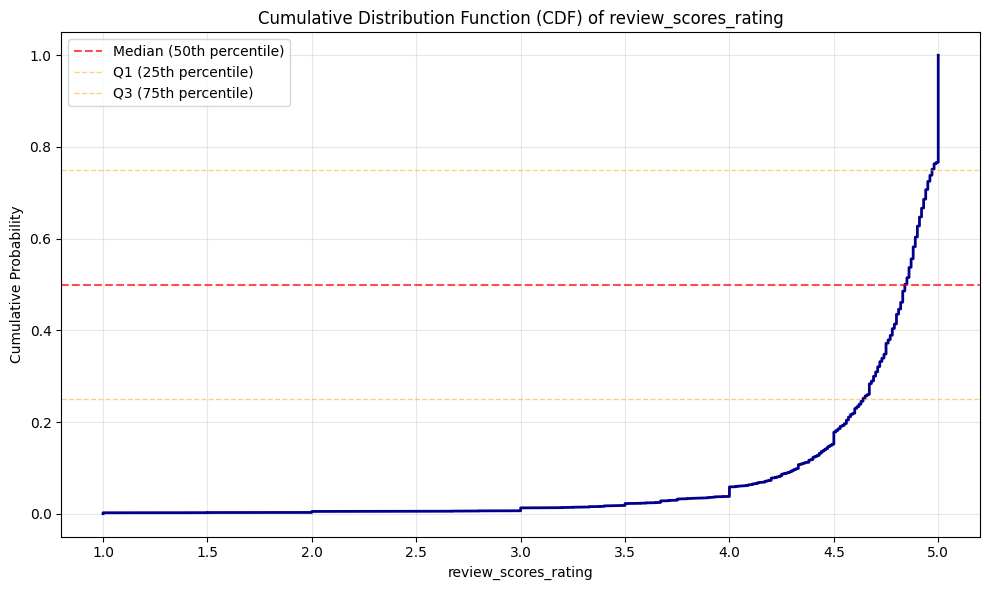

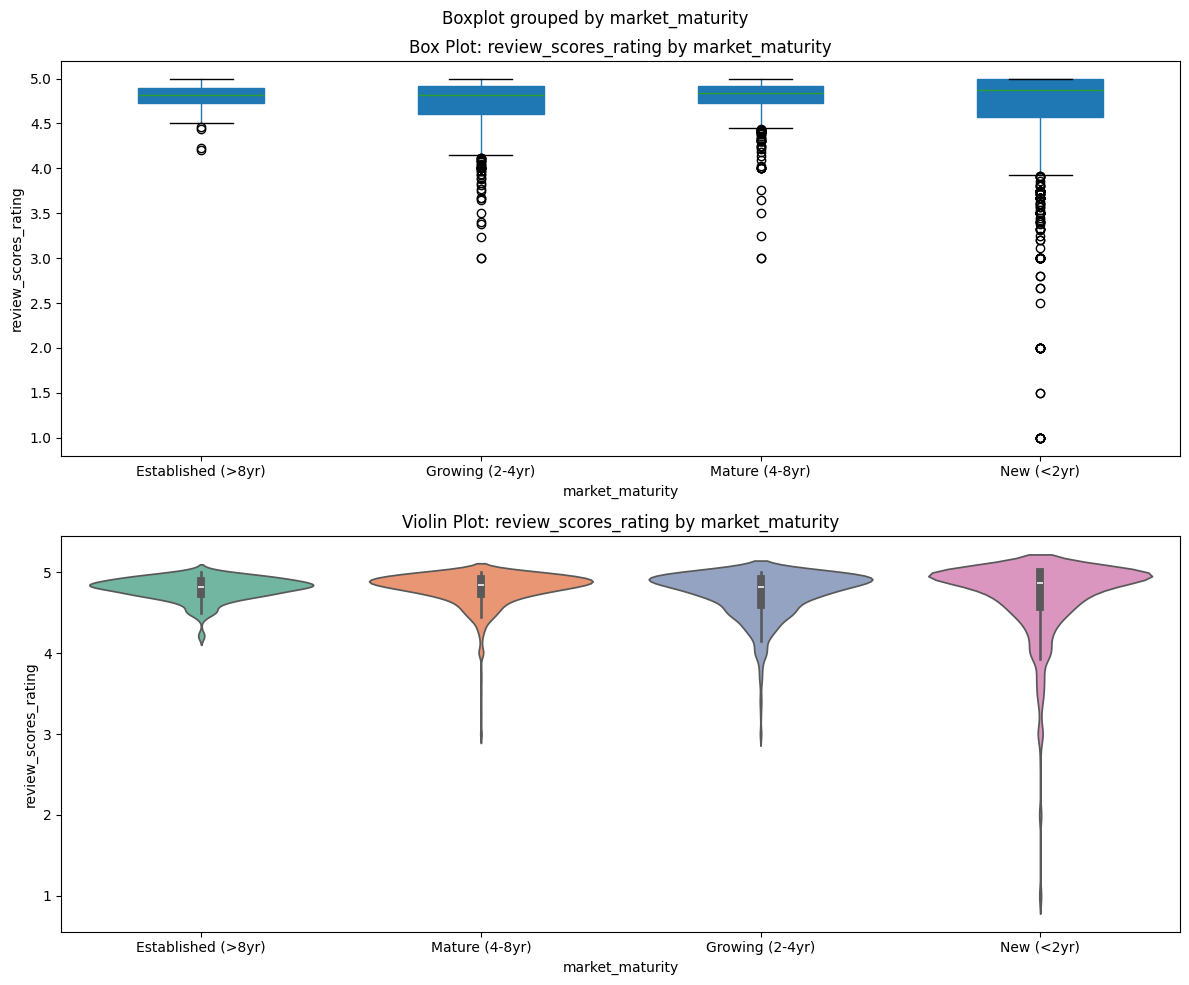

ONE-WAY ANOVA: review_scores_rating by market_maturity

Descriptive Statistics by Group:

  market_maturity = Established (>8yr):
    N:      173
    Mean:   4.7975
    Median: 4.8200
    Std:    0.1360
    Min:    4.2000
    Max:    5.0000

  market_maturity = Mature (4-8yr):
    N:      859
    Mean:   4.7916
    Median: 4.8400
    Std:    0.2139
    Min:    3.0000
    Max:    5.0000

  market_maturity = Growing (2-4yr):
    N:      923
    Mean:   4.7289
    Median: 4.8200
    Std:    0.2819
    Min:    3.0000
    Max:    5.0000

  market_maturity = New (<2yr):
    N:      2169
    Mean:   4.6828
    Median: 4.8700
    Std:    0.5112
    Min:    1.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      17.1362
  P-value:             0.000000
  Eta-squared (η²):    0.012
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). market_maturity has a significant effect

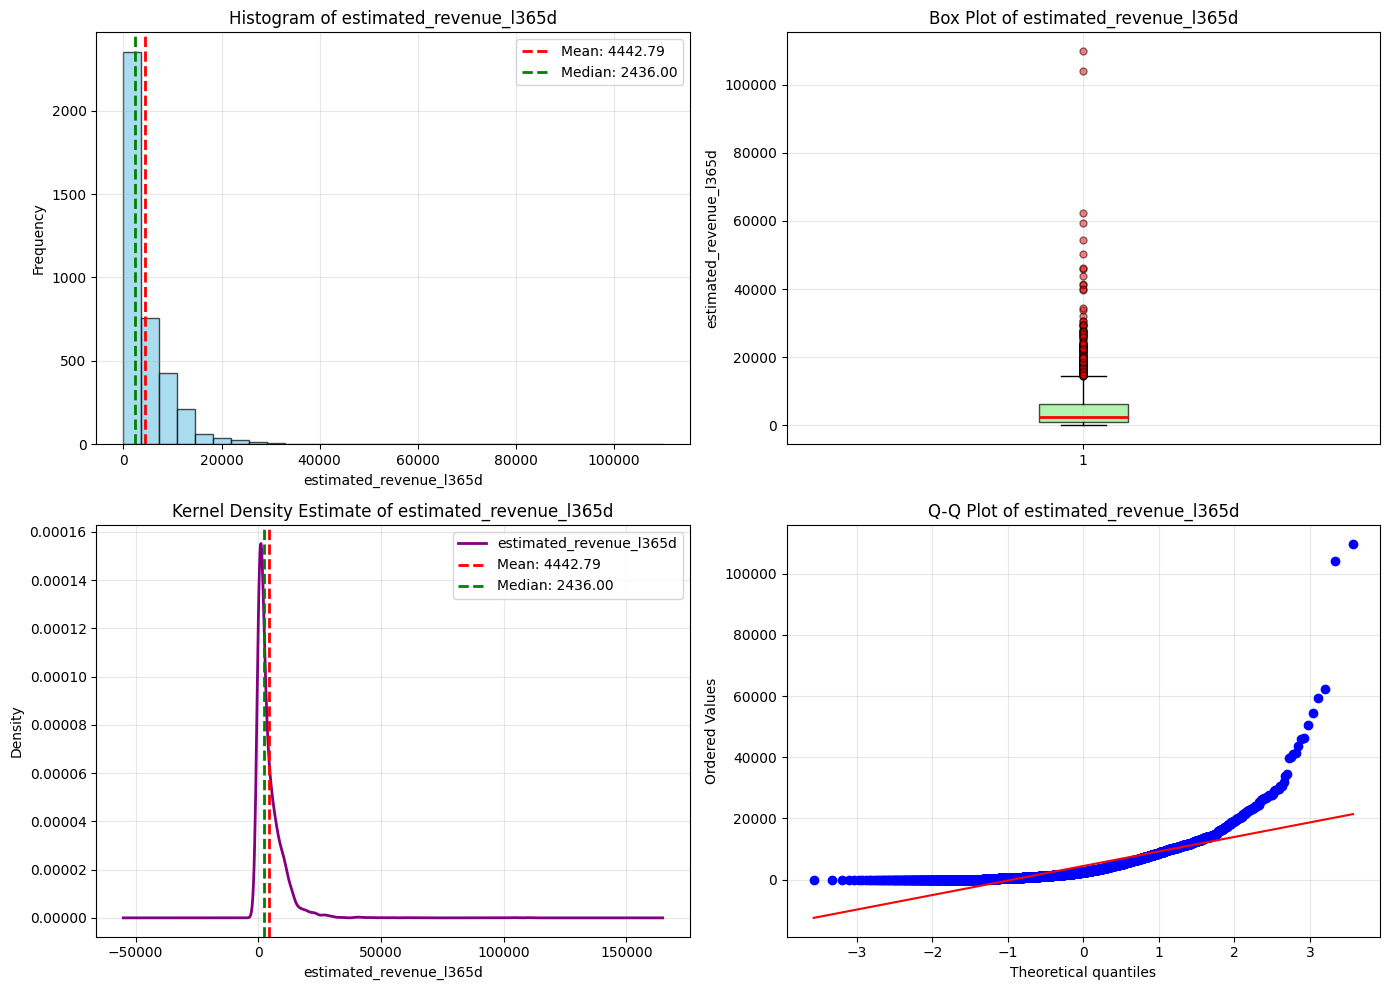

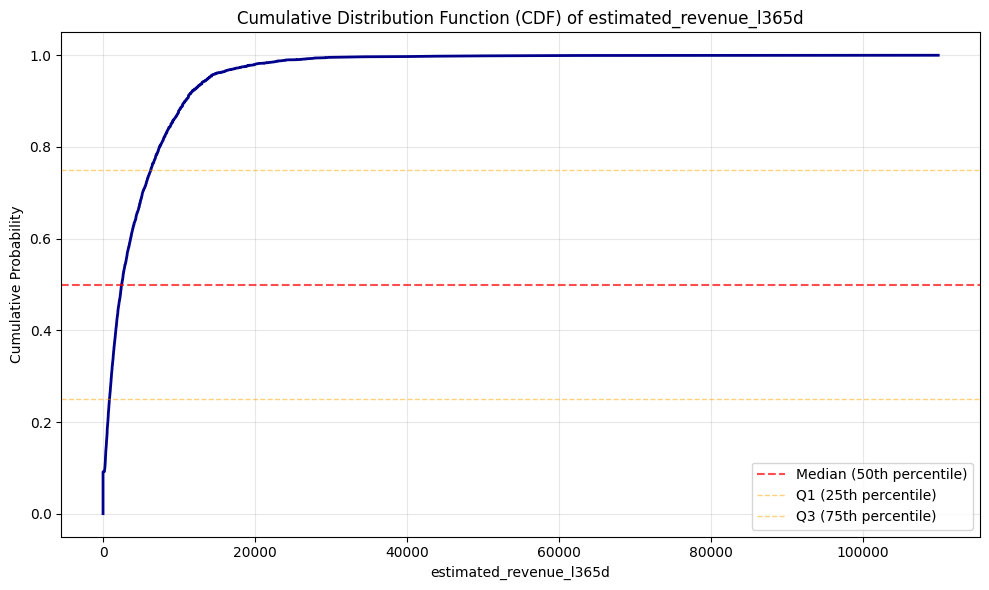

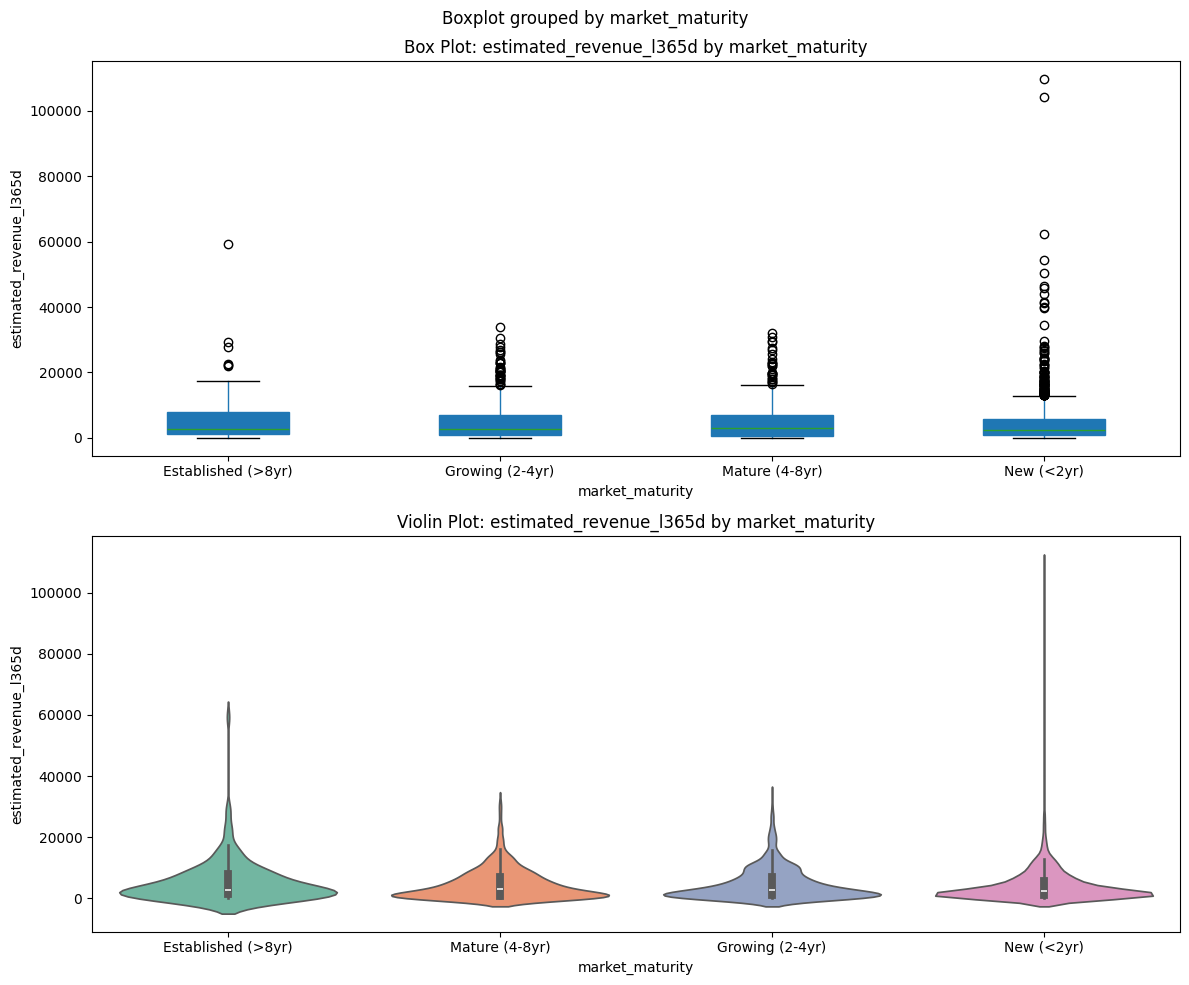

ONE-WAY ANOVA: estimated_revenue_l365d by market_maturity

Descriptive Statistics by Group:

  market_maturity = Established (>8yr):
    N:      160
    Mean:   5244.5000
    Median: 2646.0000
    Std:    7027.6538
    Min:    0.0000
    Max:    59280.0000

  market_maturity = Mature (4-8yr):
    N:      803
    Mean:   4568.1407
    Median: 2928.0000
    Std:    5144.2371
    Min:    0.0000
    Max:    32004.0000

  market_maturity = Growing (2-4yr):
    N:      876
    Mean:   4671.6747
    Median: 2763.0000
    Std:    5274.8489
    Min:    0.0000
    Max:    33810.0000

  market_maturity = New (<2yr):
    N:      2068
    Mean:   4235.1344
    Median: 2229.0000
    Std:    6242.0501
    Min:    0.0000
    Max:    109896.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      2.4330
  P-value:             0.063116
  Eta-squared (η²):    0.002
  Effect size:         Negligible effect
  Significant at α=0.05: NO

Interpretation:
  NO significant difference (

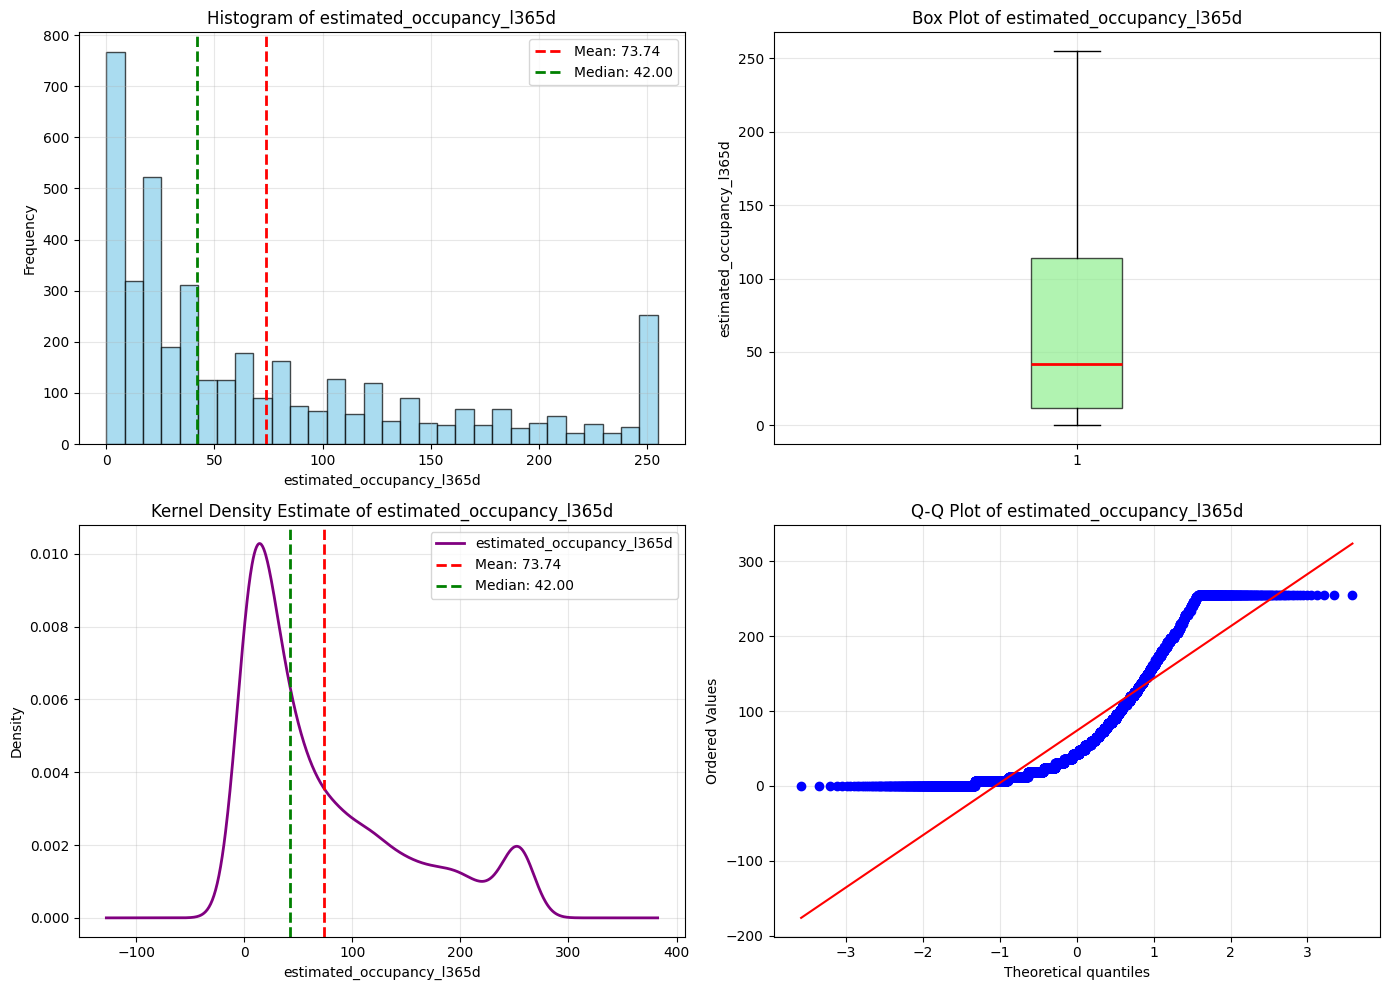

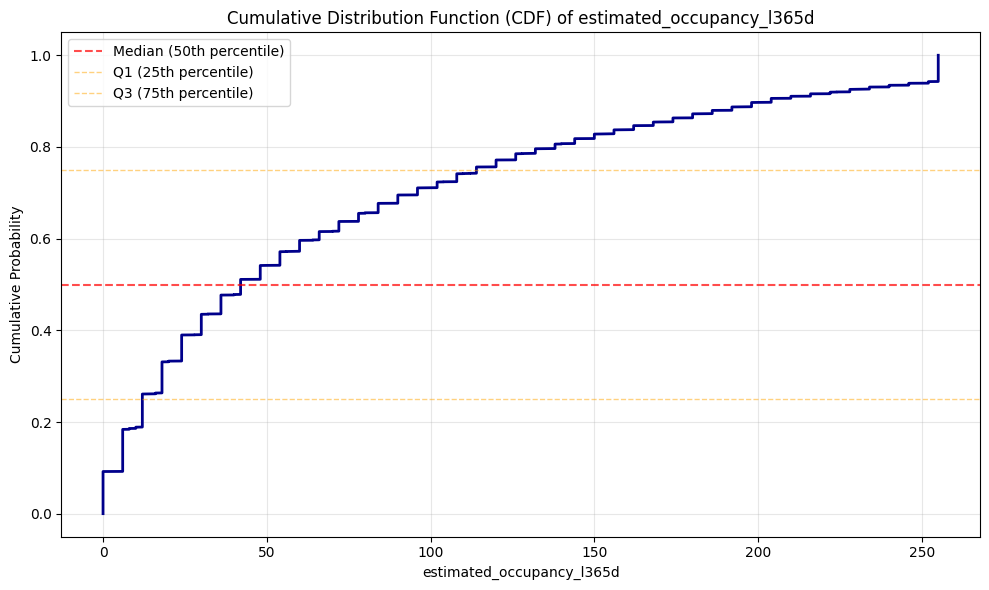

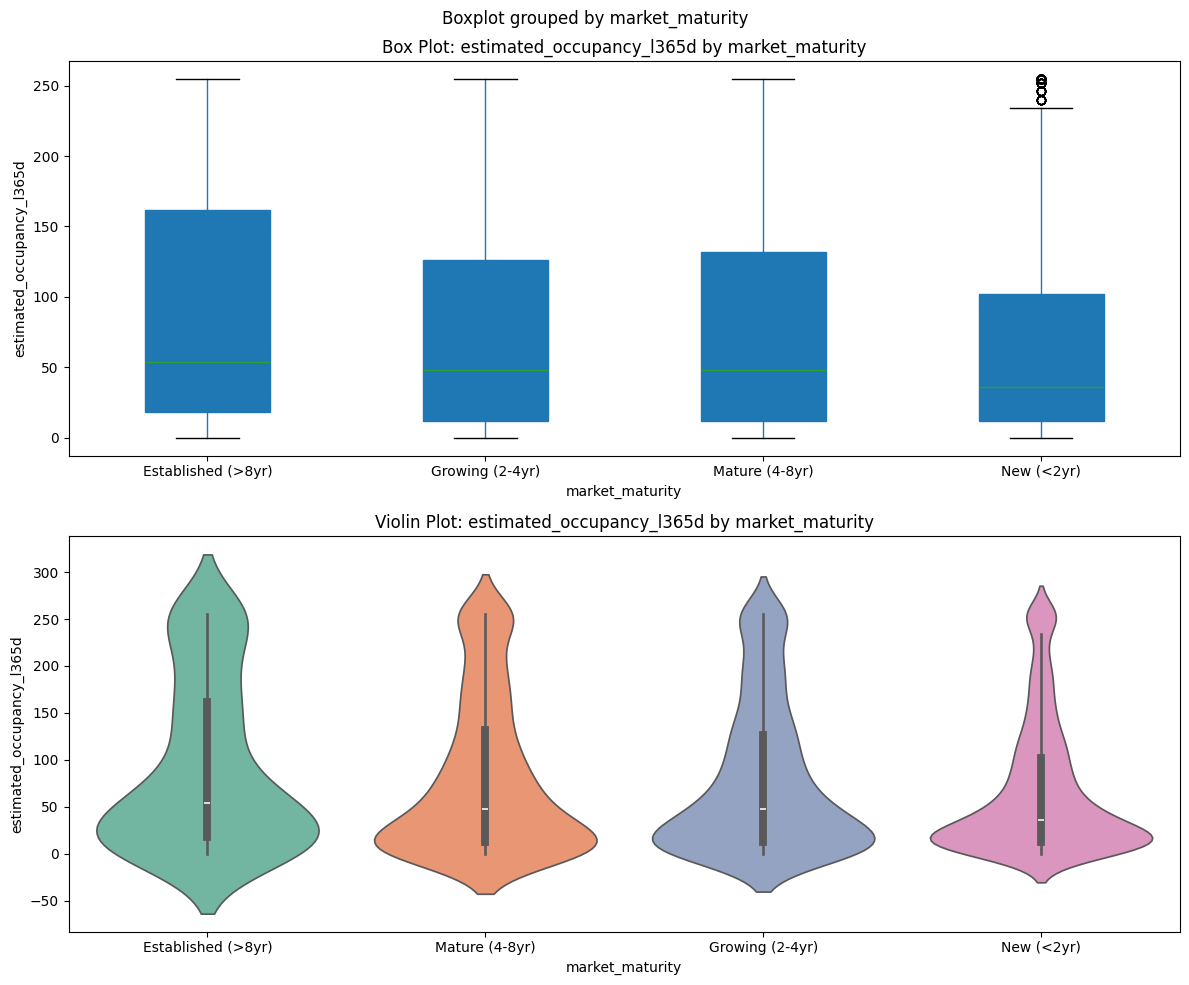

ONE-WAY ANOVA: estimated_occupancy_l365d by market_maturity

Descriptive Statistics by Group:

  market_maturity = Established (>8yr):
    N:      173
    Mean:   92.2832
    Median: 54.0000
    Std:    89.4066
    Min:    0.0000
    Max:    255.0000

  market_maturity = Mature (4-8yr):
    N:      859
    Mean:   80.4494
    Median: 48.0000
    Std:    82.3358
    Min:    0.0000
    Max:    255.0000

  market_maturity = Growing (2-4yr):
    N:      923
    Mean:   78.9415
    Median: 48.0000
    Std:    78.9855
    Min:    0.0000
    Max:    255.0000

  market_maturity = New (<2yr):
    N:      2169
    Mean:   67.3983
    Median: 36.0000
    Std:    70.7245
    Min:    0.0000
    Max:    255.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      12.1445
  P-value:             0.000000
  Eta-squared (η²):    0.009
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). market_mat

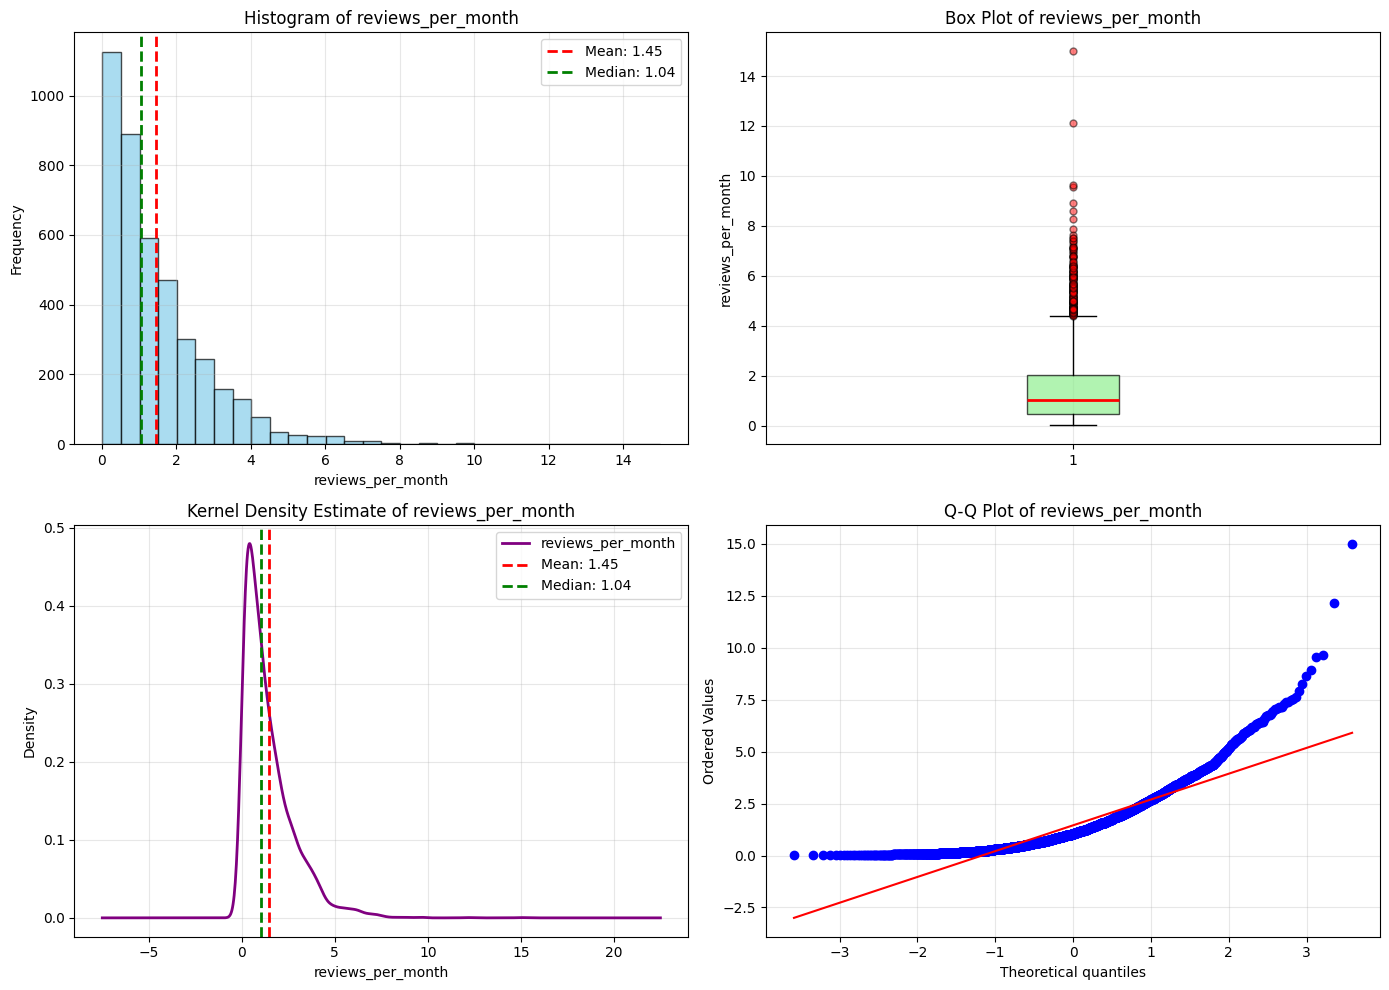

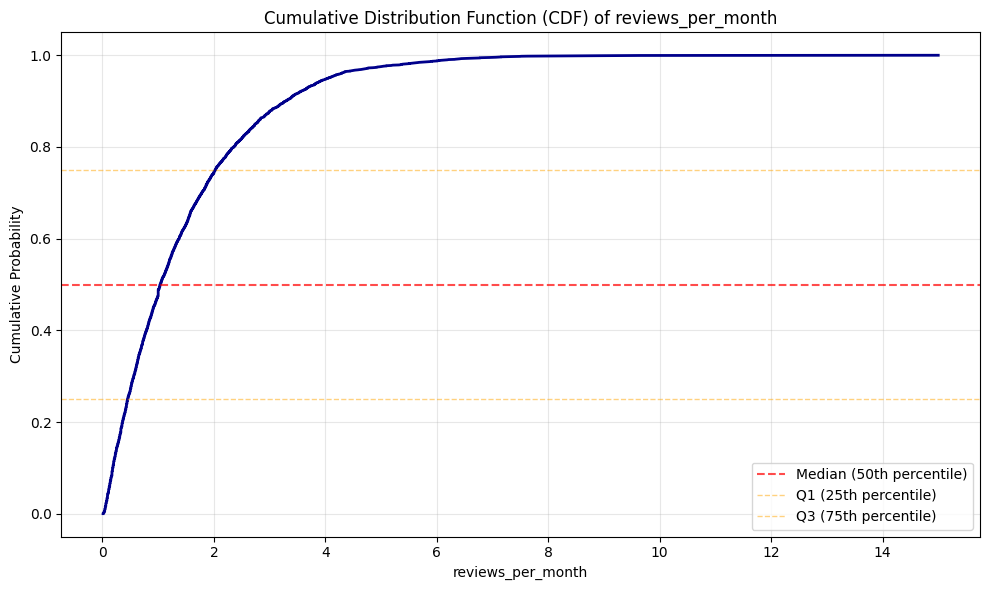

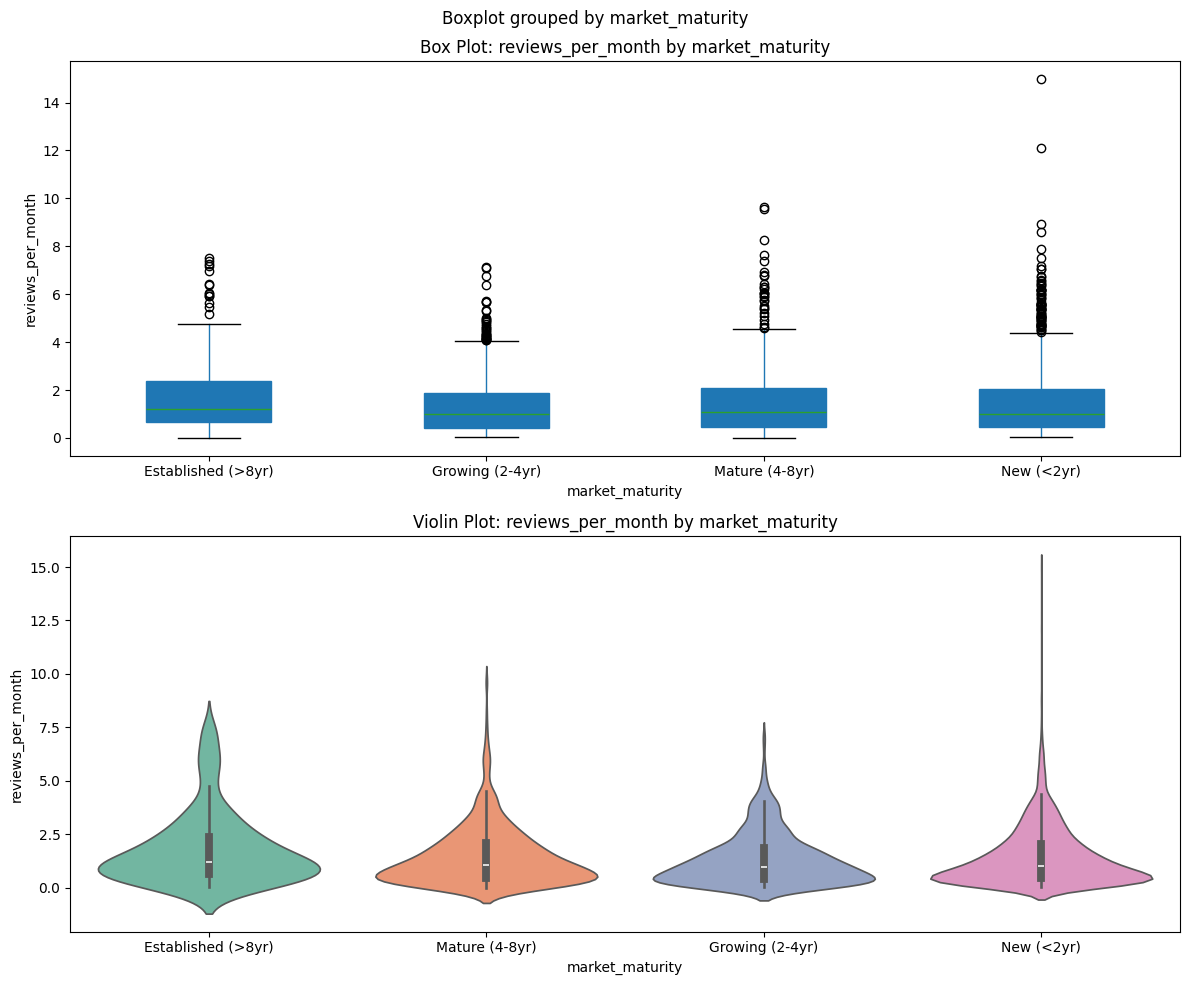

ONE-WAY ANOVA: reviews_per_month by market_maturity

Descriptive Statistics by Group:

  market_maturity = Established (>8yr):
    N:      173
    Mean:   1.8371
    Median: 1.2100
    Std:    1.7184
    Min:    0.0200
    Max:    7.5100

  market_maturity = Mature (4-8yr):
    N:      859
    Mean:   1.4806
    Median: 1.0900
    Std:    1.3832
    Min:    0.0100
    Max:    9.6500

  market_maturity = Growing (2-4yr):
    N:      923
    Mean:   1.3413
    Median: 0.9900
    Std:    1.2093
    Min:    0.0300
    Max:    7.1200

  market_maturity = New (<2yr):
    N:      2169
    Mean:   1.4547
    Median: 1.0200
    Std:    1.3668
    Min:    0.0400
    Max:    15.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      6.8557
  P-value:             0.000133
  Eta-squared (η²):    0.005
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000133). market_maturity has a significant effe

In [21]:
for var in variables:
    
    if pd.api.types.is_numeric_dtype(df[var]):
        
        analyze_numeric_variable(df[var])
        analyze_categorical_numerical(df["market_maturity"], df[var])

    else:
        
        analyze_categorical_variable(df[var])
        analyze_categorical_categorical(df["market_maturity"], df[var])

    print("\n", "\n")

In [22]:
host with most recent listings and most listings

SyntaxError: invalid syntax (3526461018.py, line 1)